In [1]:
# Importing the required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import itertools

In [2]:
# Filtering out the warnings

import warnings

warnings.filterwarnings('ignore')

# Importing the below Data set to start the analysis

**Data sets imported** ----> 
    
    1) Application_data ---> Contains all the information of the client at the time of application.
    
    2) Previous_application --->  Contains information about the client’s previous loan data.


In [3]:
# Reading of the data set "application_data".

# Data Set Location ------------> The dataset has been saved in the local system folder.

application_data = pd.read_csv("D:\\DS Course\\Exploratory Data analysis\\Credit EDA Case Study\\application_data.csv")

# ------------> Command to display all the comumns in the dataframe.
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


In [4]:
#----------------> Reviewing the Data frame "application_data".
application_data.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [5]:
# Reading of the data set "previous_application".

# Data Set Location ------------> The dataset has been saved in the local system folder.

previous_application = pd.read_csv("D:\\DS Course\\Exploratory Data analysis\\Credit EDA Case Study\\previous_application.csv")

# ------------> Command to display all the comumns in the dataframe
pd.set_option('display.max_columns', None)

In [6]:
#----------------> Reviewing the Data frame "previous_application"

previous_application.head(10)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN
5,1383531,199383,Cash loans,23703.930,315000.0,340573.5,NaN,315000.0,SATURDAY,8,Y,1,NaN,NaN,NaN,Everyday expenses,Approved,-684,Cash through the bank,XAP,Family,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,18.0,low_normal,Cash X-Sell: low,365243.0,-654.0,-144.0,-144.0,-137.0,1.0
6,2315218,175704,Cash loans,NaN,0.0,0.0,NaN,NaN,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Canceled,-14,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
7,1656711,296299,Cash loans,NaN,0.0,0.0,NaN,NaN,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Canceled,-21,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
8,2367563,342292,Cash loans,NaN,0.0,0.0,NaN,NaN,MONDAY,15,Y,1,NaN,NaN,NaN,XNA,Canceled,-386,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
9,2579447,334349,Cash loans,NaN,0.0,0.0,NaN,NaN,SATURDAY,15,Y,1,NaN,NaN,NaN,XNA,Canceled,-57,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN


# Inspect the data frames 

The Dataframes "application_data" and "previous_application" to be inspected for its "Shape" and "Info".

In [7]:
# Viewing the "shape" of the dataset "application_data"

application_data.shape

(307511, 122)

**Observation** : 
In Total, there are 307511 rows and 122 columns in the dataset "application_data"

In [8]:
# Viewing the "shape" of the dataset "previous_application"

previous_application.shape

(1670214, 37)

**Observation** : In Total, there are 1670214 rows and 37 columns in the dataset "previous_application"

In [9]:
# Checking the column-wise info of the dataframe "application_data".

application_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   SK_ID_CURR                    int64  
 1   TARGET                        int64  
 2   NAME_CONTRACT_TYPE            object 
 3   CODE_GENDER                   object 
 4   FLAG_OWN_CAR                  object 
 5   FLAG_OWN_REALTY               object 
 6   CNT_CHILDREN                  int64  
 7   AMT_INCOME_TOTAL              float64
 8   AMT_CREDIT                    float64
 9   AMT_ANNUITY                   float64
 10  AMT_GOODS_PRICE               float64
 11  NAME_TYPE_SUITE               object 
 12  NAME_INCOME_TYPE              object 
 13  NAME_EDUCATION_TYPE           object 
 14  NAME_FAMILY_STATUS            object 
 15  NAME_HOUSING_TYPE             object 
 16  REGION_POPULATION_RELATIVE    float64
 17  DAYS_BIRTH                    int64  
 18  DAYS_EMPLOYED          

In [10]:
# Checking the column-wise info of the dataframe "previous_application"

previous_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

**Observation** : 
As checked the Data types for the columns will not require changes, But there are many columns with a high no of null data. 
Currently no further analysis is being done for the "previous_application" dataframe, but will be done at a later stage as per requirement.

# Data Cleaning Procedures

As observed from the inspection of both the datasets, there is no need to drop any Rows or columns at this stage as it is not clear which data might be required for the analysis. Rather a separate data frame will be created with the requisite columns to proceed with the analysis. 

**Identification of Requisite Columns**

In order to identify the requisite columns in the Dataframe "application_data" and creating a separate dataframe with the requisite columns, the no of Null values will be identified in the columns initially to see if any of the columns can be removed based on null values

In [11]:
#---------> Checking the Null Values in the Dataframe "application_data"

application_data.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

**Observation** As checked from the data, there are many columns with null value, hence putting the same in a graph to get a better picture. 

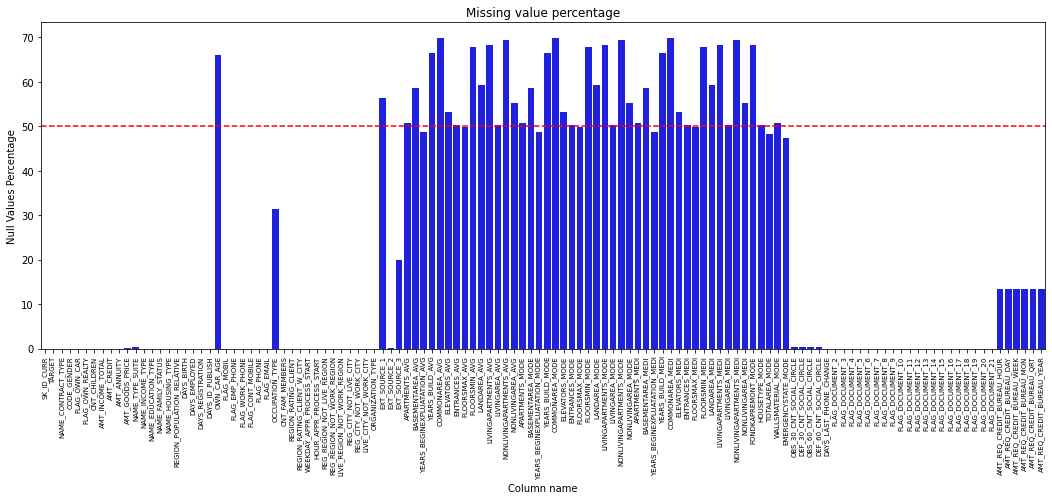

In [12]:
#------------> graphical representation of percentage of null values in dataframe 'application_data'

#columns Vs missing value percentage with 50% being the cutoff
nullDF1 = pd.DataFrame((application_data.isnull().sum())*100/application_data.shape[0]).reset_index()
nullDF1.columns = ['Column name', 'Null Values Percentage']
fig = plt.figure(figsize=(18,6))
ax = sns.barplot(x="Column name",y="Null Values Percentage",data=nullDF1,color='blue')
plt.xticks(rotation =90,fontsize =7)
ax.axhline(50, ls='--',color='red')
plt.title("Missing value percentage")
plt.show()

In [13]:
#---------------> Checking the Data wherein the no of null values are more than 50%

nullDF1[nullDF1["Null Values Percentage"]>=50].shape

(41, 2)

**Observation**: 
As seen in the above anslysis, there are 41 columns wherein the no of missing data are above 50%. Some of these columns may not be relevant. 


Many of the columns are relating to the residential/housing information (APARTMENTS_AVG to EMERGENCYSTATE_MODE) which have null data. 

Currently the data is not being inspected further, and is being considered for being dropped from the analysis at this stage. 

However these columns might be considered for review at a later stage if necessary. 


**Note** - The "Null" value function test is not being conducted for "previous_application" dataframe, and will be conducted when the data is being considered for review. 

**Verifying the Document specific columns to Check if documents provided relates to defaulting**

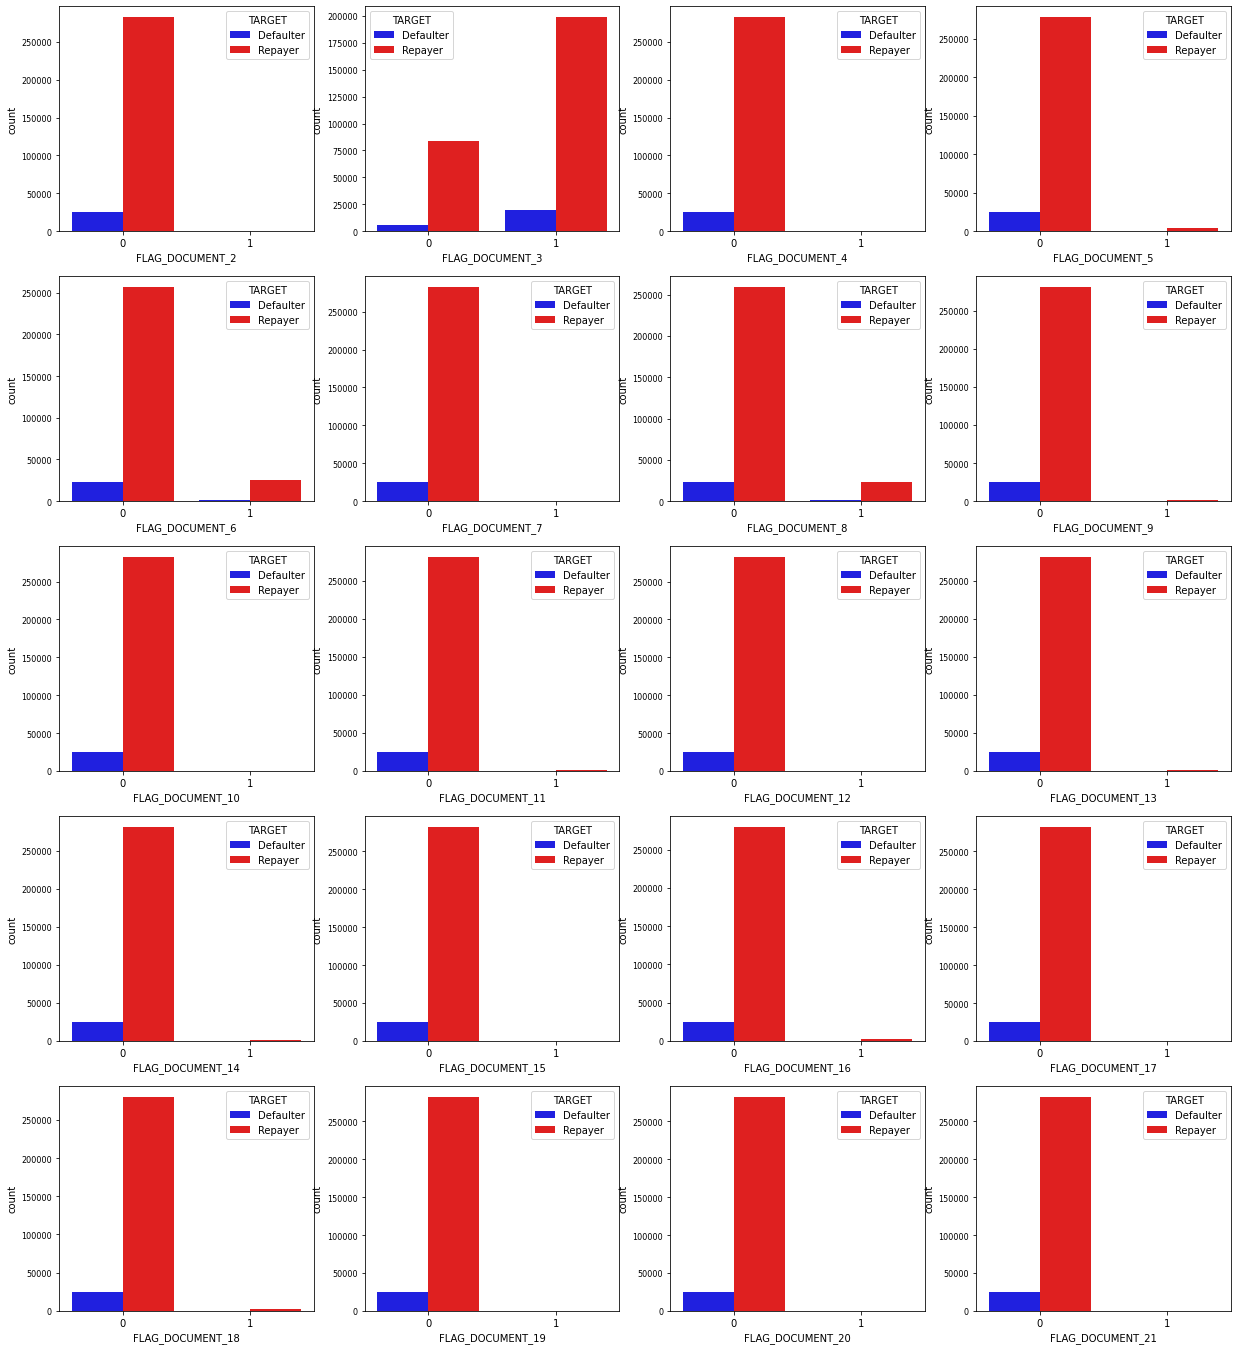

In [14]:
col_Doc = [ 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6','FLAG_DOCUMENT_7', 
           'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12','FLAG_DOCUMENT_13',
           'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
           'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

df_flag = application_data[col_Doc+["TARGET"]]

length = len(col_Doc)

df_flag["TARGET"] = df_flag["TARGET"].replace({1:"Defaulter",0:"Repayer"})

fig = plt.figure(figsize=(21,24))

for i,j in itertools.zip_longest(col_Doc,range(length)):
    plt.subplot(5,4,j+1)
    ax = sns.countplot(df_flag[i],hue=df_flag["TARGET"],palette=["b","r"])
    plt.yticks(fontsize=8)


**observation**. The above graph shows that most of the clients who applied for loans has not submitted FLAG_DOCUMENT_X except FLAG_DOCUMENT_3. Thus, Except for FLAG_DOCUMENT_3, we can delete rest of the columns.

Data shows if borrower has submitted FLAG_DOCUMENT_3 then there is a less chance of defaulting the loan.

Though no furthur analysis can be done on this as it is unclear as to what kind of document is submitted under flag document_3. Whether the document is a specific category or is a specific serial no which is assigned based on the document submission. 

since it is not clear hence no much analysis can be done in this regard.

# Creation of a New Data frame with Requisite columns. 

Based on the "null" Value test conducted on "application_data" DF to identify the requisite columns, a new Dataframe is created and has been named as "Selected_data".

In [15]:
#------------>Creation of a new DF "Selected_data" with selected columns from "application_data" DF.

Selected_data= application_data.loc[:,"SK_ID_CURR":"EXT_SOURCE_3"]

In [16]:
#-------------> Reviewing the "Selected_data" DF.

Selected_data.head()

# Result of the Review-----> The Data frame has been created with the requisite columns which are necessary for analysis.

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,NaN,0.650442,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,NaN,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,NaN,0.322738,NaN


In [17]:
# Inspecting the Shape of the "Selected_data" DF

Selected_data.shape

(307511, 44)

**Observation** : As observed, the No of columms have been trimmed down to 44 with the 307511 rows with an intention to only focus on the requisite details. 

In [18]:
# Checking the further information of the DF "Selected_data".

Selected_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,3522.886321,1509.450419,11.944812,0.001803,0.384280,0.399526,0.043164,0.449521,0.231307,0.910682,0.509034,0.502737,3.265832,0.122126,0.219526,0.197499,0.268444,0.421124,0.383817,0.211062,1.910602e-01,0.194844
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,-24672.000000,-7197.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.014568,8.173617e-08,0.000527
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,-7479.500000,-4299.000000,5.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,2.000000,2.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.334007,3.924574e-01,0.370650
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,-4504.000000,-3254.000000,9.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,2.000000,2.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.505998,5.659614e-01,0.535276
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,-2010.000000,-1720.000000,15.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,3.000000,2.000000,2.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.675053,6.636171e-01,0.669057
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,0.000000,0.000000,91.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,20.000000,3.000000,3.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.962693,8.549997e-01,0.896010


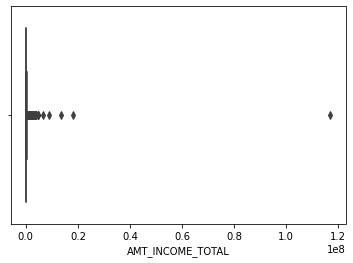

In [19]:
#---------------> Checking for Income outliers in the DF "application_data"

sns.boxplot(Selected_data.AMT_INCOME_TOTAL)
plt.show()

**Observation** :As observed, the Values in the below columns are not displayed correctly, hence the value will be standardized.

a) AMT_INCOME_TOTAL

b) AMT_CREDIT

c) AMT_ANNUITY

d) AMT_GOODS_PRICE

Also there is an outlier in "AMT_INCOME_TOTAL" which is observed, hence will have to be treated. 


**Verifying Outliers in other Columns**

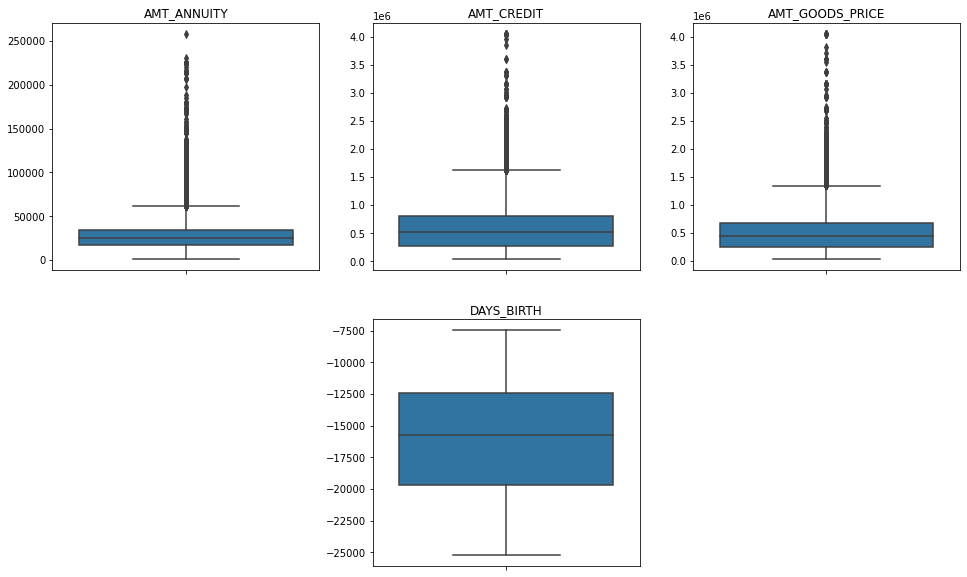

In [20]:
#---------------> Checking for outliers in the DF "application_data" for other columns:
plt.figure(figsize=(22,10))

app_outlier_col_1 = ['AMT_ANNUITY','AMT_CREDIT','AMT_GOODS_PRICE']
app_outlier_col_2 = ['DAYS_BIRTH']
for i in enumerate(app_outlier_col_1):
    plt.subplot(2,4,i[0]+1)
    sns.boxplot(y=Selected_data[i[1]])
    plt.title(i[1])
    plt.ylabel("")

for i in enumerate(app_outlier_col_2):
    plt.subplot(2,4,i[0]+6)
    sns.boxplot(y=Selected_data[i[1]])
    plt.title(i[1])
    plt.ylabel("")

**Observation**
As observed in the above 4 plots, the distrubution of data is normal and outliews were not observed. Hence no specific treatment is required to be done. 

Next step will be initiating standardization procedure on the data set "Selected_data".

# Standardization of Values in the DF "Selected_data"

**Standardization 1:** 

Before proceeding with the analysis, standardization of values for below columns is required to be done, as it is observed that the columns have values updated as no of days, and hence needs to be converted to no of years. 

1) DAYS_BIRTH

2) DAYS_EMPLOYED

3) DAYS_REGISTRATION

4) DAYS_ID_PUBLISH

**Approach**: As per Approach, the data will be converted into years and will be stored in separate columns, and the existing columns which stored the data in days format will be dropped.

The conversion will be done by dividing the column values by "-365" using lambda function. The motive behind using "-365" is to get a positive value post conversion since the values in the columns are displayed as -ve values. 




**Standardization 2:** The below columns needs to be converted into Millions by using lambda function in the same column.

1) AMT_INCOME_TOTAL

2) AMT_CREDIT

3) AMT_ANNUITY

4) AMT_GOODS_PRICE


**Standardization 3:**
A column will be created which will store the numeric flag value corrosponding to the value  updated in "NAME_CONTRACT_TYPE". As per the assignment, Flag value "1" will be assigned to "Revolving Loans" and "0" will be assigned to "Cash Loans".

In [21]:
# ----------> Standardization 1:Converting the 4 columns into no of years

Selected_data["YEARS_BIRTH"] = Selected_data.DAYS_BIRTH.apply(lambda x : x//-365)
Selected_data["YEARS_EMPLOYED"] = Selected_data.DAYS_EMPLOYED.apply(lambda x : x//-365)
Selected_data["YEARS_REGISTRATION"] = Selected_data.DAYS_REGISTRATION.apply(lambda x : x//-365)
Selected_data["YEARS_ID_PUBLISH"] = Selected_data.DAYS_ID_PUBLISH.apply(lambda x : x//-365)

# ----------> Dropping the Existing Columns which stored the data in days format. 
Selected_data = Selected_data.drop(Selected_data.loc[:,"DAYS_BIRTH":"DAYS_ID_PUBLISH"], axis = 1)

In [22]:
# ----------> Standardization 2:Converting the columns into millions (1000000) by using lambda function. 

Selected_data["AMT_INCOME_TOTAL"] = Selected_data.AMT_INCOME_TOTAL.apply(lambda x : x/1000000)
Selected_data["AMT_CREDIT"] = Selected_data.AMT_CREDIT.apply(lambda x : x/1000000)
Selected_data["AMT_ANNUITY"] = Selected_data.AMT_ANNUITY.apply(lambda x : x/1000000)
Selected_data["AMT_GOODS_PRICE"] = Selected_data.AMT_GOODS_PRICE.apply(lambda x : x/1000000)

#Note -- The conversion is done in the same column and no dropping of column is required. 

In [23]:
#--------> Assigning Flag value "1" to "Revolving Loans" and "0" to "Cash Loans" in a separate column "Contract_Flag"

Selected_data["Contract_Flag"] = np.where(Selected_data.NAME_CONTRACT_TYPE == "Revolving loans", 1, 0)

In [24]:
#---------> Reviewing the Data frame with the Added columns post conversion and Flag Assignment. 
Selected_data.head(15)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,Contract_Flag
0,100002,1,Cash loans,M,N,Y,0,0.202500,0.406598,0.024701,0.3510,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,25,1,9.0,5,0
1,100003,0,Cash loans,F,N,N,0,0.270000,1.293502,0.035699,1.1295,Family,State servant,Higher education,Married,House / apartment,0.003541,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,45,3,3.0,0,0
2,100004,0,Revolving loans,M,Y,Y,0,0.067500,0.135000,0.006750,0.1350,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,52,0,11.0,6,1
3,100006,0,Cash loans,F,N,Y,0,0.135000,0.312682,0.029687,0.2970,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,NaN,0.650442,NaN,52,8,26.0,6,0
4,100007,0,Cash loans,M,N,Y,0,0.121500,0.513000,0.021865,0.5130,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,NaN,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,NaN,0.322738,NaN,54,8,11.0,9,0
5,100008,0,Cash loans,M,N,Y,0,0.099000,0.490495,0.027518,0.4545,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,0.035792,NaN,1,1,1,1,1,0,Laborers,2.0,2,2,WEDNESDAY,16,0,0,0,0,0,0,Other,NaN,0.354225,0.621226,46,4,13.0,1,0
6,100009,0,Cash loans,F,Y,Y,1,0.171000,1.560726,0.041301,1.3950,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.035792,17.0,1,1,0,1,1,0,Accountants,3.0,2,2,SUNDAY,16,0,0,0,0,0,0,Business Entity Type 3,0.774761,0.724000,0.492060,37,8,3.0,1,0
7,100010,0,Cash loans,M,Y,Y,0,0.360000,1.530000,0.042075,1.5300,Unaccompanied,State servant,Higher education,Married,House / apartment,0.003122,8.0,1,1,1,1,0,0,Managers,2.0,3,3,MONDAY,16,0,0,0,0,1,1,Other,NaN,0.714279,0.540654,51,1,12.0,6,0
8,100011,0,Cash loans,F,N,Y,0,0.112500,1.019610,0.033827,0.9135,Children,Pensioner,Secondary / secondary special,Married,House / apartment,0.018634,NaN,1,0,0,1,0,0,NaN,2.0,2,2,WEDNESDAY,14,0,0,0,0,0,0,XNA,0.587334,0.205747,0.751724,55,-1001,20.0,9,0
9,100012,0,Revolving loans,M,N,Y,0,0.135000,0.405000,0.020250,0.4050,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.019689,NaN,1,1,0,1,0,0,Laborers,1.0,2,2,THURSDAY,8,0,0,0,0,0,0,Electricity,NaN,0.746644,NaN,39,5,39.0,10,1


In [25]:
# -----------------> Reviewing the shape of the Dataframe

Selected_data.shape

(307511, 45)

**Result of the Review**


**Standardization Process 1**:
After conversion of the columns in the dataframe, on review, the new columns have been created correctly as stated below: 
1) YEARS_BIRTH

2) YEARS_EMPLOYED

3) YEARS_REGISTRATION

4) YEARS_ID_PUBLISH

Also the previous columns which had the data stored in days format has been dropped. This can be verified from the shape of the data, wherein the no of columns is 41 same as when verified before conversion activity was undertaken. 



**Standardization Process 2**:

The below columns have been converted into millions (1000000).

1) AMT_INCOME_TOTAL

2) AMT_CREDIT

3) AMT_ANNUITY

4) AMT_GOODS_PRICE


**Standardization Process 3**:
Another Column "Contract_Flag" has also been added, which has stored the numeric flag value corrosponding to the value updated in "NAME_CONTRACT_TYPE" column.

**Observation**:
As observed in the columns which were created, the data is calculated correctly and displaying as years. But in "YEARS_EMPLOYED" column, it is observed in some of the rows an abnormal value "-1001" is updated. This needs to be inspected further. 


**Approach**: As per the approach, the Distrubition of the "No of years" based on the count will be done, and then necessary course will be taken. 

**Treatment of the Outlier:**

As observed in the previous section that there was an outlier in the "AMT_INCOME_TOTAL". Hence to identify the appropriate step, further analysis of the data is required.

For that first the data of the ourlier needs to be extracted. 

As per the approach, the applicants above the income of 10 million will be extracted.

In [26]:
#----------------> Extracting the Outliers. 

Outliers= Selected_data[Selected_data["AMT_INCOME_TOTAL"]>10.0]
Outliers

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,Contract_Flag
12840,114967,1,Cash loans,F,N,Y,1,117.00000,0.562491,0.026194,0.4545,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.010643,NaN,1,1,0,1,0,0,Laborers,3.0,2,2,TUESDAY,14,0,0,0,0,0,0,Business Entity Type 3,0.460809,0.113161,0.145543,34,2,18.0,9,0
203693,336147,0,Cash loans,M,Y,Y,2,18.00009,0.675000,0.069295,0.6750,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.030755,7.0,1,1,0,1,0,0,NaN,4.0,2,2,THURSDAY,22,0,0,0,0,0,0,Business Entity Type 3,0.543417,0.788606,NaN,43,13,9.0,12,0
246858,385674,0,Cash loans,M,Y,Y,0,13.50000,1.400503,0.130945,1.3680,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.030755,10.0,1,1,1,1,0,0,NaN,2.0,2,2,SUNDAY,12,0,0,0,0,0,0,Business Entity Type 3,NaN,0.713507,NaN,37,0,10.0,13,0


**Observation:**
So as observed, there are three applicants who have an income of above 10 million

On close analysis, the data doesnot seem to be correct which is justified from the below insights
a) -- For the applicant, who has the highest income "117.00000" has the occupation of a labourer, which is not in line with the income. 

b) -- The other two applicants, the occupation has not been updated, and for one of the applicants, the "YEARS_EMPLOYED" is 0, which is also not consistent with the income. 

**Final Action:**  Since the no of rows is very negligible compared to the total data set, but retaining the same will have a major impact on the analysis, hence it is avvisable to drop the three rows from the analysis.  


In [27]:
#----------> Dropping of the three rows from the data set "Selected_data".
Selected_data = Selected_data.drop([12840, 203693, 246858])

In [28]:
# On verifying the shape, the no of rows have Reduced compared to the previous row value of "307511"

Selected_data.shape

(307508, 45)

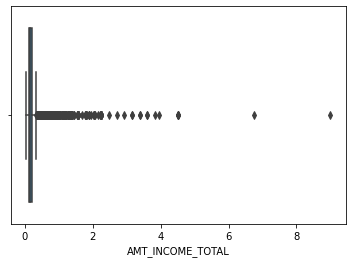

In [29]:
#---------------> Reviewing for Income outliers in the DF "application_data"

sns.boxplot(Selected_data.AMT_INCOME_TOTAL)
plt.show()

**Observation:** As observed, post outlier being removed, the income distrubution of the applicants are consistent compared to the previous box plot which was created. 

**Additional Activity**:There are 3 columns relating to Normalized score (EXT_SOURCE_1, EXT_SOURCE_2, EXT_SOURCE_3). So for the analysis, an additional column will be created "EXT_SOURCE_AVG". 

*Note*: It is observed that in the columns, there are many values which have been updated as "NaN", which will be considered as "0" during the process.
    

In [30]:
#-------------------> Creation of an additional Column "EXT_SOURCE_AVG" with the avg values of the Normalized score.
Selected_data ["EXT_SOURCE_AVG"] = (Selected_data["EXT_SOURCE_1"].fillna(0)+Selected_data["EXT_SOURCE_2"].fillna(0)+Selected_data["EXT_SOURCE_3"].fillna(0))/3

#-----------------> Verifying the Dataframe "Selected_data"
Selected_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,Contract_Flag,EXT_SOURCE_AVG
0,100002,1,Cash loans,M,N,Y,0,0.2025,0.406598,0.024701,0.3510,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,25,1,9.0,5,0,0.161787
1,100003,0,Cash loans,F,N,N,0,0.2700,1.293502,0.035699,1.1295,Family,State servant,Higher education,Married,House / apartment,0.003541,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,45,3,3.0,0,0,0.311171
2,100004,0,Revolving loans,M,Y,Y,0,0.0675,0.135000,0.006750,0.1350,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,52,0,11.0,6,1,0.428493
3,100006,0,Cash loans,F,N,Y,0,0.1350,0.312682,0.029687,0.2970,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,NaN,0.650442,NaN,52,8,26.0,6,0,0.216814
4,100007,0,Cash loans,M,N,Y,0,0.1215,0.513000,0.021865,0.5130,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,NaN,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,NaN,0.322738,NaN,54,8,11.0,9,0,0.107579


**Result of the verification**: As verified, the Column has been created with the average value of the Normalized score (EXT_SOURCE_1, EXT_SOURCE_2, EXT_SOURCE_3).

In [31]:
#Verifying the distrubution of the data in "YEARS_EMPLOYED" column. 

Selected_data["YEARS_EMPLOYED"].value_counts()

-1001    55374
 1       31841
 2       29647
 0       27903
 3       25107
 4       21767
 5       16271
 6       15051
 7       13148
 8       11440
 9        8980
 10       7364
 11       5902
 12       5309
 14       4643
 13       4348
 15       2725
 16       2335
 17       2006
 18       1918
 19       1871
 20       1600
 21       1461
 22       1253
 23       1016
 24        914
 25        821
 27        656
 26        653
 28        611
 29        567
 30        457
 31        437
 34        364
 32        351
 33        331
 35        257
 36        196
 37        138
 39        125
 38        116
 40         59
 41         59
 42         42
 44         31
 43         19
 45         14
 46          4
 48          4
 47          1
 49          1
Name: YEARS_EMPLOYED, dtype: int64

**Observation**

As observed, there is a substansial data which has been updated with "-1001" value, and mere deletion of the data will have an impact on the analysis. 

So appropriate handling needs to be done for the data inorder to proceed with the analysis. 

**Approach**: Before any decision is taken, further information is required for the data. So as an initial step, the data will be filtered out, and then analysed to get more insights. 

This activity will be done post analysis of the "Selected_data" DF and deriving insights from the data.

**Analysis of "Selected_data" DF**

The data set will be analysed on various aspects to get information on the profile of the applicants.

In [32]:
#-------------------> Distrubution of Applicants in terms of "NAME_CONTRACT_TYPE"
NAME_CONTRACT_TYPE = Selected_data.NAME_CONTRACT_TYPE.value_counts()
NAME_CONTRACT_TYPE

Cash loans         278229
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64

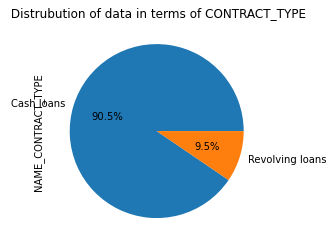

In [33]:
#-------------------> Distrubution of data in terms of "NAME_CONTRACT_TYPE"
NAME_CONTRACT_TYPE.plot.pie(y = "NAME_CONTRACT_TYPE", title = " Distrubution of data in terms of CONTRACT_TYPE",autopct = "%1.1f%%")
plt.show()

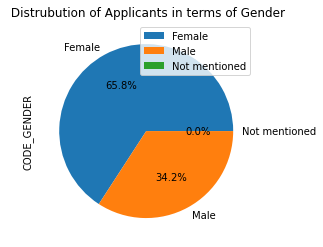

In [34]:
#-------------------> Distrubution of Applicants in terms of "CODE_GENDER"

gender = pd.DataFrame(Selected_data.CODE_GENDER.value_counts(normalize = True)*100)
gender.rename(index = {"F": "Female", "M" : "Male", "XNA" : "Not mentioned"}, inplace = True)
gender.plot.pie(y = "CODE_GENDER", title = " Distrubution of Applicants in terms of Gender",autopct = "%1.1f%%")
plt.show()

In [35]:
#-------------------> Distrubution of Applicants in terms of "CODE_GENDER"
Selected_data.CODE_GENDER.value_counts()

F      202447
M      105057
XNA         4
Name: CODE_GENDER, dtype: int64

**observation** Since 'Not mentioned' variable is in small number, it will not effect our analysis. If necessary, we may consider it as female since it is the mode  

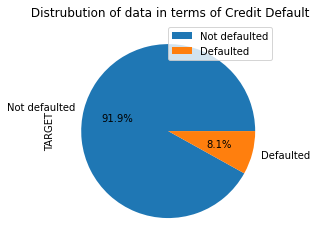

In [36]:
#-------------------> %  Distrubution of Applicants in terms of "TARGET"

TARGET = pd.DataFrame(Selected_data.TARGET.value_counts(normalize = True)*100)
TARGET.rename(index = {0: "Not defaulted", 1 : "Defaulted"}, inplace = True)
TARGET.plot.pie(y = "TARGET", title = " Distrubution of data in terms of Credit Default",autopct = "%1.1f%%")
plt.show()


In [37]:
# -------------------> Distrubution of Count of Applicants in terms of "TARGET"
Selected_data.TARGET.value_counts()

0    282684
1     24824
Name: TARGET, dtype: int64

In [38]:
#----------------> Finding the ratio of Non defaulted vs defaulted

Ratio= len(Selected_data[Selected_data['TARGET']==0])//len(Selected_data[Selected_data['TARGET']==1])

Ratio             

11

**Observation** As observed, the dataset is highly imbalanced with the ratio of Non defaulted vs defaulted (0:1) being at 11.38:1. 

This indicates that in every 11.38 applicant atleast one is Defaulted.


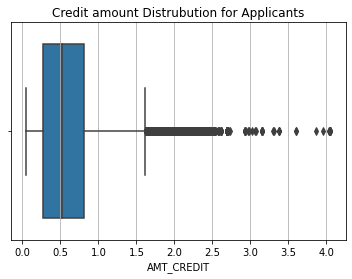

In [39]:
#----------------> Analysing the distrubution of amount of credit applied among applicants. Column considered "AMT_CREDIT"

sns.boxplot(Selected_data["AMT_CREDIT"],plt.grid(True))
plt.title("Credit amount Distrubution for Applicants")
plt.show()

In [40]:
Selected_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,Contract_Flag,EXT_SOURCE_AVG
count,307508.000000,307508.000000,307508.000000,307508.000000,307508.000000,307496.000000,307230.000000,307508.000000,104580.000000,307508.000000,307508.000000,307508.000000,307508.000000,307508.000000,307508.000000,307506.000000,307508.000000,307508.000000,307508.000000,307508.000000,307508.000000,307508.000000,307508.000000,307508.000000,307508.000000,134131.000000,3.068480e+05,246545.000000,307508.000000,307508.000000,307508.000000,307508.000000,307508.000000,307508.000000
mean,278180.511271,0.080726,0.417046,0.168317,0.599023,0.027108,0.538393,0.020868,12.061159,0.999997,0.819888,0.199367,0.998133,0.281069,0.056720,2.152657,2.052464,2.031521,12.063380,0.015144,0.050769,0.040659,0.078174,0.230456,0.179556,0.502130,5.143924e-01,0.510854,43.436021,-175.303524,13.168692,7.713438,0.095214,0.380630
std,102790.019439,0.272415,0.722118,0.101134,0.402490,0.014492,0.369445,0.013831,11.944914,0.001803,0.384282,0.399525,0.043164,0.449522,0.231308,0.910679,0.509036,0.502739,3.265797,0.122127,0.219527,0.197500,0.268445,0.421125,0.383818,0.211064,1.910587e-01,0.194843,11.954633,386.996755,9.646880,4.134516,0.293510,0.156004
min,100002.000000,0.000000,0.000000,0.025650,0.045000,0.001615,0.040500,0.000290,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.014568,8.173617e-08,0.000527,20.000000,-1001.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.750000,0.000000,0.000000,0.112500,0.270000,0.016524,0.238500,0.010006,5.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,2.000000,2.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.334007,3.924574e-01,0.370650,34.000000,0.000000,5.000000,4.000000,0.000000,0.266439
50%,278201.500000,0.000000,0.000000,0.147150,0.513531,0.024903,0.450000,0.018850,9.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,2.000000,2.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.505998,5.659614e-01,0.535276,43.000000,3.000000,12.000000,8.000000,0.000000,0.380847
75%,367142.250000,0.000000,1.000000,0.202500,0.808650,0.034596,0.679500,0.028663,15.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,3.000000,2.000000,2.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.675057,6.636171e-01,0.669057,53.000000,7.000000,20.000000,11.000000,0.000000,0.479480
max,456255.000000,1.000000,19.000000,9.000000,4.050000,0.258026,4.050000,0.072508,91.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,20.000000,3.000000,3.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.962693,8.549997e-01,0.896010,69.000000,49.000000,67.000000,19.000000,1.000000,0.853417


**Observation** As observed, the Applicant credit amount mainly ranged between 0.3 to 0.8 million with a median of 0.51. The lowest being at 0.04 and the highest Credit amount being at 4.05 million

**Creation of a new dataframe "YEARS_EMPLOYED_MISSING" to analyse the missing Employment Year Data.**

As highlighted before the analysis of "Selected_data" DF, that a separate data set is required to be created with the details of the applicants with missing Employment Year Data. 

Hence in the below section the separate data set is being created for the analysis

In [41]:
#--------------> Creation of a new dataframe "YEARS_EMPLOYED_MISSING" to analyse the missing Employment Year Data.

YEARS_EMPLOYED_MISSING = Selected_data[Selected_data["YEARS_EMPLOYED"]<0]

#-----------------> Reviewing the Data frame
YEARS_EMPLOYED_MISSING.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,Contract_Flag,EXT_SOURCE_AVG
8,100011,0,Cash loans,F,N,Y,0,0.112500,1.019610,0.033827,0.9135,Children,Pensioner,Secondary / secondary special,Married,House / apartment,0.018634,NaN,1,0,0,1,0,0,NaN,2.0,2,2,WEDNESDAY,14,0,0,0,0,0,0,XNA,0.587334,0.205747,0.751724,55,-1001,20.0,9,0,0.514935
11,100015,0,Cash loans,F,N,Y,0,0.038419,0.148365,0.010679,0.1350,Children,Pensioner,Secondary / secondary special,Married,House / apartment,0.015221,NaN,1,0,0,1,1,0,NaN,2.0,2,2,FRIDAY,7,0,0,0,0,0,0,XNA,0.722044,0.555183,0.652897,55,-1001,14.0,6,0,0.643375
23,100027,0,Cash loans,F,N,Y,0,0.083250,0.239850,0.023850,0.2250,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.006296,NaN,1,0,0,1,1,0,NaN,2.0,3,3,FRIDAY,12,0,0,0,0,0,0,XNA,NaN,0.624305,0.669057,68,-1001,24.0,10,0,0.431120
38,100045,0,Cash loans,F,N,Y,0,0.099000,0.247275,0.017338,0.2250,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.006207,NaN,1,0,0,1,1,0,NaN,2.0,2,2,FRIDAY,11,0,0,0,0,0,0,XNA,NaN,0.650765,0.751724,65,-1001,26.0,13,0,0.467496
43,100050,0,Cash loans,F,N,Y,0,0.108000,0.746280,0.042971,0.6750,Unaccompanied,Pensioner,Higher education,Single / not married,House / apartment,0.010966,NaN,1,0,0,1,0,0,NaN,1.0,2,2,WEDNESDAY,9,0,0,0,0,0,0,XNA,NaN,0.766138,0.684828,64,-1001,15.0,12,0,0.483655


In [42]:
#----------------> Reviewing the shape of the DF "YEARS_EMPLOYED_MISSING"
YEARS_EMPLOYED_MISSING.shape


(55374, 46)

**Result of the Review**: The DF "YEARS_EMPLOYED_MISSING" has been created correctly with only the filtered out data of "-1001" in "YEARS_EMPLOYED" column.

# Analysing the "YEARS_EMPLOYED_MISSING" Data frame

Now as the filtered out data has been created, necessary analysis will be done to get more insight on the DF.

The below insights will be extracted from the data:

a) Count Distrubution of the "NAME_INCOME_TYPE".

b) Age group Distrubution by creating a distrubution plot.

**a) Count Distrubution of the "NAME_INCOME_TYPE".**

In [43]:
#------------------> a) Count Distrubution of the "NAME_INCOME_TYPE" from "YEARS_EMPLOYED_MISSING" DF
YEARS_EMPLOYED_MISSING.NAME_INCOME_TYPE.value_counts()

Pensioner     55352
Unemployed       22
Name: NAME_INCOME_TYPE, dtype: int64

**Observation**: As observed, the applicants mostly comprise of "Pensioner", with a marginal no of "Unemployed".

Now to verify if any other "Pensioner" or "Unemployed" applicants are there in the "Selected_data" DF wherein the "YEARS_EMPLOYED" has been updated with a acceptable value, and not updated as "-1001".

This will be verified by finding the count distrubution of the "NAME_INCOME_TYPE" in the "Selected_data" DF.

In [44]:
#----------------->  Finding the count distrubution of the "NAME_INCOME_TYPE" in the "Selected_data" DF.

NAME_INCOME_TYPE = pd.DataFrame(Selected_data.NAME_INCOME_TYPE.value_counts())
NAME_INCOME_TYPE

,NAME_INCOME_TYPE
Working,158773
Commercial associate,71615
Pensioner,55362
State servant,21703
Unemployed,22
Student,18
Businessman,10
Maternity leave,5


In [45]:
#---------------------> Finding the %age distrubution on basis of Income type.
INCOME_TYPE_dist = pd.DataFrame(Selected_data.NAME_INCOME_TYPE.value_counts(normalize = True)*100)
INCOME_TYPE_dist

,NAME_INCOME_TYPE
Working,51.632153
Commercial associate,23.288825
Pensioner,18.003434
State servant,7.057703
Unemployed,0.007154
Student,0.005854
Businessman,0.003252
Maternity leave,0.001626


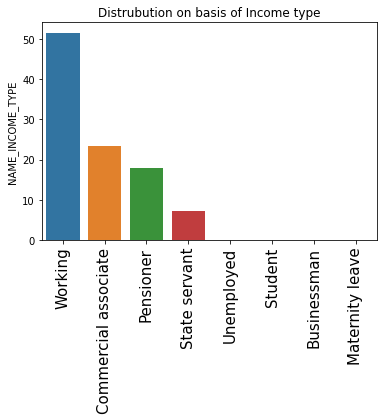

In [46]:
#---------------------> Finding the distrubution on basis of Income type.
sns.barplot(y = INCOME_TYPE_dist['NAME_INCOME_TYPE'], x = INCOME_TYPE_dist.index.values)
plt.xticks(rotation = 90, fontsize = 15 )
plt.title("Distrubution on basis of Income type")
plt.show()

**Observation** - As checked, the in "Selected_data" the no of pensioner is "55362", whereas in the "YEARS_EMPLOYED_MISSING" DF there are "55352" Applicants, so there are addition 10 Applicants for whom the "YEARS_EMPLOYED" value is correctly updated, and not updated as "-1001".

So the data needs to be identified.

In [47]:
# Procedure for identification of Pensioners with correct "YEARS_EMPLOYED" value.
YEARS_EMPLOYED_Truevalue = Selected_data[(Selected_data["YEARS_EMPLOYED"]>0) & (Selected_data["NAME_INCOME_TYPE"] == "Pensioner")]

#---------------> Reviewing The Data.
YEARS_EMPLOYED_Truevalue

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,Contract_Flag,EXT_SOURCE_AVG
18196,121224,0,Revolving loans,F,N,Y,0,0.09450,0.1800,0.009000,0.1800,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.018850,NaN,1,1,1,1,1,0,NaN,2.0,2,2,FRIDAY,14,0,0,0,0,1,1,Business Entity Type 2,NaN,0.444632,0.216403,56,3,2.0,11,1,0.220345
33165,138428,0,Revolving loans,M,N,Y,1,0.07650,0.2250,0.011250,0.3600,NaN,Pensioner,Secondary / secondary special,Single / not married,Municipal apartment,0.031329,NaN,1,1,1,1,1,0,NaN,2.0,2,2,THURSDAY,10,0,0,0,0,0,0,Industry: type 9,NaN,0.162192,0.292588,50,14,30.0,5,1,0.151593
106630,223714,0,Revolving loans,F,N,Y,0,0.15750,0.1800,0.009000,NaN,NaN,Pensioner,Secondary / secondary special,Widow,House / apartment,0.028663,NaN,1,1,1,1,1,0,Laborers,1.0,2,2,THURSDAY,8,0,0,0,0,1,1,Business Entity Type 3,NaN,0.460624,0.584990,60,6,17.0,13,1,0.348538
108373,225712,0,Revolving loans,F,N,Y,0,0.13500,0.3375,0.016875,0.3375,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.005313,NaN,1,1,1,1,1,0,NaN,2.0,2,2,MONDAY,15,0,0,0,0,0,0,Business Entity Type 3,NaN,0.636410,0.132597,59,30,25.0,13,1,0.256336
113694,231855,0,Revolving loans,F,N,Y,0,0.10350,0.1800,0.009000,0.4500,Unaccompanied,Pensioner,Secondary / secondary special,Widow,House / apartment,0.024610,NaN,1,1,1,1,1,0,Medicine staff,1.0,2,2,THURSDAY,14,0,0,0,0,0,0,Medicine,NaN,0.605882,0.394495,55,35,17.0,9,1,0.333459
124165,243990,0,Revolving loans,F,N,Y,0,0.06750,0.1350,0.006750,0.1350,Unaccompanied,Pensioner,Secondary / secondary special,Civil marriage,House / apartment,0.031329,NaN,1,1,1,1,1,0,NaN,2.0,2,2,TUESDAY,11,0,0,0,0,0,0,Business Entity Type 3,NaN,0.665693,0.656158,57,5,40.0,11,1,0.440617
134595,256117,0,Revolving loans,M,Y,Y,0,0.07875,0.1575,0.007875,0.1575,Unaccompanied,Pensioner,Incomplete higher,Separated,House / apartment,0.031329,16.0,1,1,0,1,1,0,NaN,1.0,2,2,MONDAY,8,0,0,0,0,0,0,Military,NaN,0.384929,0.718033,41,22,2.0,13,1,0.367654
206030,338811,0,Revolving loans,M,N,Y,0,0.15750,0.4500,0.022500,0.4500,Unaccompanied,Pensioner,Secondary / secondary special,Civil marriage,House / apartment,0.022625,NaN,1,1,0,1,1,0,NaN,2.0,2,2,SATURDAY,11,0,0,0,0,0,0,Trade: type 7,NaN,0.359197,NaN,57,8,22.0,12,1,0.119732
274863,418551,0,Revolving loans,F,N,Y,0,0.14850,0.3600,0.018000,0.5850,Family,Pensioner,Secondary / secondary special,Married,House / apartment,0.002042,NaN,1,1,1,1,0,0,Sales staff,2.0,3,3,FRIDAY,10,0,0,0,0,0,0,Self-employed,NaN,0.539500,0.297087,57,4,28.0,7,1,0.278862
291644,437867,0,Revolving loans,F,N,N,0,0.09000,0.1350,0.006750,0.1350,Unaccompanied,Pensioner,Secondary / secondary special,Separated,House / apartment,0.018029,NaN,1,1,1,1,1,0,NaN,1.0,3,2,TUESDAY,10,0,0,0,0,0,0,School,NaN,0.618042,0.546023,50,4,4.0,5,1,0.388022


**Observation** : As checked, the data has details of 10 "pensioners" for whom the "YEARS_EMPLOYED" detail is updated with an authentic value.

So as an approach, the 10 Rows data which is identified for the pensioner will be merged with the "YEARS_EMPLOYED_MISSING" DF, and analysed. 

In [48]:
#---------------------> Merging the rows of the Data frame "YEARS_EMPLOYED_Truevalue" with the "YEARS_EMPLOYED_MISSING" DF.

YEARS_EMPLOYED_MISSING = pd.concat([YEARS_EMPLOYED_MISSING,YEARS_EMPLOYED_Truevalue], axis = 0)

#------------------------> Verifying whether the addition has been done correctly or not.
YEARS_EMPLOYED_MISSING.NAME_INCOME_TYPE.value_counts()


Pensioner     55362
Unemployed       22
Name: NAME_INCOME_TYPE, dtype: int64

**Result of the Verification** - As checked the data in "YEARS_EMPLOYED_Truevalue" has been added into "YEARS_EMPLOYED_MISSING", which can be observed from the no of pensioner which is updated as "55362" from the previously checked count of "55352".

In [49]:
#-----------------> Retriving Basic information on the data.

YEARS_EMPLOYED_MISSING.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,Contract_Flag,EXT_SOURCE_AVG
count,55384.000000,55384.000000,55384.000000,55384.000000,55384.000000,55384.000000,55361.000000,55384.000000,10170.000000,55384.0,55384.000000,55384.000000,55384.000000,55384.000000,55384.000000,55384.000000,55384.000000,55384.000000,55384.000000,55384.000000,55384.0,55384.0,55384.000000,55384.000000,55384.000000,12857.000000,55228.000000,44314.000000,55384.000000,55384.000000,55384.000000,55384.000000,55384.000000,55384.000000
mean,278477.790499,0.053987,0.046132,0.136391,0.542634,0.023902,0.488268,0.020749,13.091052,1.0,0.000181,0.000163,0.999314,0.296584,0.025838,1.697963,2.088220,2.068810,11.426423,0.005597,0.0,0.0,0.025368,0.000036,0.000036,0.692897,0.506433,0.558809,59.247978,-1000.816897,17.541835,10.124224,0.060956,0.370991
std,102674.317526,0.225994,0.275878,0.076656,0.378490,0.013308,0.347136,0.013634,11.543586,0.0,0.013436,0.012747,0.026185,0.456756,0.158653,0.558570,0.491903,0.483831,3.025714,0.074606,0.0,0.0,0.157243,0.006009,0.006009,0.161788,0.195957,0.181909,5.506425,13.626359,11.505089,3.071447,0.239252,0.158549
min,100011.000000,0.000000,0.000000,0.025650,0.045000,0.001615,0.045000,0.000290,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.025084,0.000024,0.000527,21.000000,-1001.000000,0.000000,0.000000,0.000000,0.000000
25%,189622.750000,0.000000,0.000000,0.090000,0.254700,0.014504,0.225000,0.010032,6.000000,1.0,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,2.000000,2.000000,9.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.616968,0.363078,0.441836,57.000000,-1001.000000,8.000000,9.000000,0.000000,0.254158
50%,278988.500000,0.000000,0.000000,0.117000,0.457834,0.021775,0.450000,0.018850,11.000000,1.0,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000,2.000000,2.000000,11.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.728865,0.560649,0.591977,60.000000,-1001.000000,17.000000,11.000000,0.000000,0.371346
75%,367051.000000,0.000000,0.000000,0.166500,0.755190,0.029940,0.675000,0.026392,17.000000,1.0,0.000000,0.000000,1.000000,1.000000,0.000000,2.000000,2.000000,2.000000,13.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.811266,0.662248,0.701696,63.000000,-1001.000000,27.000000,12.000000,0.000000,0.461583
max,456252.000000,1.000000,14.000000,2.250000,3.312162,0.225000,3.150000,0.072508,65.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,16.000000,3.000000,3.000000,23.000000,1.000000,0.0,0.0,1.000000,1.000000,1.000000,0.962693,0.855000,0.896010,69.000000,35.000000,67.000000,17.000000,1.000000,0.844981


**b) Age group Distrubution by creating a distrubution plot**

Now since the rows are updated, next analysis will be to check the "Age distrubution" of the dataframe "YEARS_EMPLOYED_MISSING"

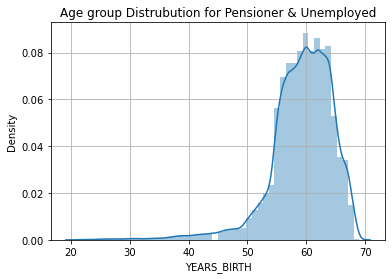

In [50]:
#-----------------> Checking the Age group Distrubution by creating a distrubution plot using seaborn

sns.distplot(YEARS_EMPLOYED_MISSING["YEARS_BIRTH"],plt.grid(True))
plt.title("Age group Distrubution for Pensioner & Unemployed")
plt.show()

**Observation**: As checked, the data is mainly concentrated in the age group 50 to 70 years.

**Course Path** -- As per the approach, the Analysis of the "YEARS_EMPLOYED_MISSING" will be done separately as the details consists of mainly Pensioners in the age group of 50- 70 yrs to identify the patterns.

But since the analysis for this age group cannot be siloed from the main data, hence at a later stage, a value will be assigned to the "YEARS_EMPLOYED" data in the main data frame "Selected_data" for further analysis.

# Anaysis of "YEARS_EMPLOYED_MISSING" Data frame

In the anaysis of the data frame, insights will be derived to find out applicants with high probability of defaulting on loans.

The below dimensions will be checked inorder get some insights so as to get a pattern on where there are high chances of loan defaults

a) Gender dimension

b) Age dimension

c) Occupation demographics to find out where the default is more. 

**Gender Dimension**

In [51]:
#-----------> Firstly the distrubution of gender in the Dataframe to be verified

YEARS_EMPLOYED_MISSING.CODE_GENDER.value_counts()

F    45278
M    10106
Name: CODE_GENDER, dtype: int64

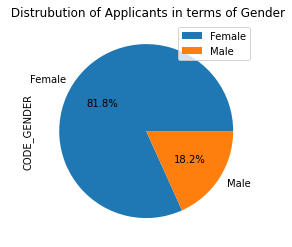

In [52]:
#-------------------> Distrubution of pensioner/Unemployeds Applicants in terms of "CODE_GENDER"

YEARS_EMPLOYED_MISSING_gender = pd.DataFrame(YEARS_EMPLOYED_MISSING.CODE_GENDER.value_counts(normalize = True)*100)
YEARS_EMPLOYED_MISSING_gender.rename(index = {"F": "Female", "M" : "Male"}, inplace = True)
YEARS_EMPLOYED_MISSING_gender.plot.pie(y = "CODE_GENDER", title = " Distrubution of Applicants in terms of Gender",autopct = "%1.1f%%")
plt.show()

**Observarion**: As checked, the no of "Females" are more compared to "Males". But Not much insights can be derived from this apart from the fact that female pensioners are the most who apply for loans compared to male pensioners. 

So further drilling down this by identifying the gender who have defaulted the most.

In [53]:
#-------------> Drilling down the dataframe to identify which gender has defaulted the most.

#-------------> Preparing a Data set with only the data of defaulters i.e. "Target" Flag = "1".
Target_defaulter = YEARS_EMPLOYED_MISSING[YEARS_EMPLOYED_MISSING["TARGET"]==1]

#------------> deriving distrubution of gender in the Dataframe to be verified
Target_defaulter.CODE_GENDER.value_counts()

F    2249
M     741
Name: CODE_GENDER, dtype: int64

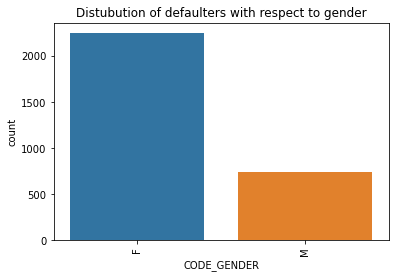

In [54]:
# ---------->count plot
plt.figure()
plt.xticks(rotation=90)
plt.title('Distubution of defaulters with respect to gender')
ax = sns.countplot(data =Target_defaulter , x= Target_defaulter['CODE_GENDER'],order=Target_defaulter['CODE_GENDER'].value_counts().index)

**Observarion**: So as seen, the no of "Females" who have defaulted are more compared to "Males", which was again quite predictable as there were more female applicants compared to male applicants. 

But Again one one aspect we need to identify is how many "Unemployeds" have defaulted in the payment of the loans.

In [55]:
# --------------> Checkinng the no of employeds who have defaulted in payment of the loans.

Target_defaulter[Target_defaulter["NAME_INCOME_TYPE"] == "Unemployed"]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,Contract_Flag,EXT_SOURCE_AVG
23834,127729,1,Cash loans,F,N,Y,0,0.0990,0.7830,0.022306,0.7830,Unaccompanied,Unemployed,Secondary / secondary special,Widow,House / apartment,0.018209,NaN,1,0,0,1,0,0,NaN,1.0,3,3,TUESDAY,14,0,0,0,0,0,0,XNA,NaN,0.006939,NaN,64,-1001,15.0,12,0,0.002313
37512,143454,1,Cash loans,M,Y,Y,0,0.0315,0.5850,0.026892,0.5850,Unaccompanied,Unemployed,Secondary / secondary special,Married,House / apartment,0.025164,4.0,1,0,0,1,1,1,NaN,2.0,2,2,MONDAY,11,0,0,0,0,0,0,XNA,0.060694,0.276265,NaN,33,-1001,0.0,2,0,0.112320
78336,190812,1,Cash loans,F,N,Y,0,0.0450,0.3285,0.010629,0.3285,Unaccompanied,Unemployed,Secondary / secondary special,Single / not married,House / apartment,0.014520,NaN,1,0,0,1,0,0,NaN,1.0,2,2,WEDNESDAY,13,0,0,0,0,0,0,XNA,NaN,0.428753,NaN,62,-1001,23.0,11,0,0.142918
80704,193571,1,Cash loans,F,N,Y,0,0.0900,0.5715,0.020525,0.5715,Unaccompanied,Unemployed,Secondary / secondary special,Married,House / apartment,0.035792,NaN,1,0,0,1,0,0,NaN,2.0,2,2,FRIDAY,10,0,0,0,0,0,0,XNA,NaN,0.698729,NaN,63,-1001,33.0,11,0,0.232910
209722,343054,1,Cash loans,F,N,N,0,0.0630,1.2150,0.038839,1.2150,Unaccompanied,Unemployed,Secondary / secondary special,Married,Municipal apartment,0.011657,NaN,1,0,0,1,0,0,NaN,2.0,1,1,FRIDAY,13,0,0,0,0,0,0,XNA,NaN,0.153221,NaN,49,-1001,24.0,4,0,0.051074
209835,343178,1,Cash loans,F,N,Y,0,0.1350,0.3870,0.022235,0.3870,Unaccompanied,Unemployed,Secondary / secondary special,Married,House / apartment,0.008019,NaN,1,0,0,1,0,0,NaN,2.0,2,2,MONDAY,10,1,0,0,0,0,0,XNA,NaN,0.680949,NaN,47,-1001,15.0,2,0,0.226983
216436,350785,1,Cash loans,F,N,N,0,0.0450,0.6345,0.025097,0.6345,Unaccompanied,Unemployed,Incomplete higher,Married,With parents,0.009175,NaN,1,0,0,1,0,0,NaN,2.0,2,2,THURSDAY,12,0,0,0,0,0,0,XNA,NaN,0.042442,NaN,23,-1001,3.0,2,0,0.014147
237750,375382,1,Cash loans,M,Y,Y,1,0.0675,0.5085,0.014486,0.5085,Unaccompanied,Unemployed,Secondary / secondary special,Married,House / apartment,0.015221,3.0,1,0,0,1,1,0,NaN,3.0,2,2,FRIDAY,11,0,0,0,0,0,0,XNA,0.269725,0.172111,NaN,31,-1001,11.0,10,0,0.147279


In [56]:
Target_defaulter[(Target_defaulter["NAME_INCOME_TYPE"] == "Unemployed")& (Target_defaulter["CODE_GENDER"] == "F")]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,Contract_Flag,EXT_SOURCE_AVG
23834,127729,1,Cash loans,F,N,Y,0,0.099,0.7830,0.022306,0.7830,Unaccompanied,Unemployed,Secondary / secondary special,Widow,House / apartment,0.018209,NaN,1,0,0,1,0,0,NaN,1.0,3,3,TUESDAY,14,0,0,0,0,0,0,XNA,NaN,0.006939,NaN,64,-1001,15.0,12,0,0.002313
78336,190812,1,Cash loans,F,N,Y,0,0.045,0.3285,0.010629,0.3285,Unaccompanied,Unemployed,Secondary / secondary special,Single / not married,House / apartment,0.014520,NaN,1,0,0,1,0,0,NaN,1.0,2,2,WEDNESDAY,13,0,0,0,0,0,0,XNA,NaN,0.428753,NaN,62,-1001,23.0,11,0,0.142918
80704,193571,1,Cash loans,F,N,Y,0,0.090,0.5715,0.020525,0.5715,Unaccompanied,Unemployed,Secondary / secondary special,Married,House / apartment,0.035792,NaN,1,0,0,1,0,0,NaN,2.0,2,2,FRIDAY,10,0,0,0,0,0,0,XNA,NaN,0.698729,NaN,63,-1001,33.0,11,0,0.232910
209722,343054,1,Cash loans,F,N,N,0,0.063,1.2150,0.038839,1.2150,Unaccompanied,Unemployed,Secondary / secondary special,Married,Municipal apartment,0.011657,NaN,1,0,0,1,0,0,NaN,2.0,1,1,FRIDAY,13,0,0,0,0,0,0,XNA,NaN,0.153221,NaN,49,-1001,24.0,4,0,0.051074
209835,343178,1,Cash loans,F,N,Y,0,0.135,0.3870,0.022235,0.3870,Unaccompanied,Unemployed,Secondary / secondary special,Married,House / apartment,0.008019,NaN,1,0,0,1,0,0,NaN,2.0,2,2,MONDAY,10,1,0,0,0,0,0,XNA,NaN,0.680949,NaN,47,-1001,15.0,2,0,0.226983
216436,350785,1,Cash loans,F,N,N,0,0.045,0.6345,0.025097,0.6345,Unaccompanied,Unemployed,Incomplete higher,Married,With parents,0.009175,NaN,1,0,0,1,0,0,NaN,2.0,2,2,THURSDAY,12,0,0,0,0,0,0,XNA,NaN,0.042442,NaN,23,-1001,3.0,2,0,0.014147


**Observation** - As checked from the dataset by only filtering the "Unemployed" details, out of 22, only 8 were found to have been defaulted. 

Out of which 6 are females.

Other insights which were identified for unemployed applicants, apart from the fact that all applicants were females are as below: 

a) Applicants had defaulted on "Cash loans".

b) None of the female Applicants owned a car(as updated in "FLAG_OWN_CAR" column).

Though the conclusion might be very initial considering the data count, but the insights can be kept a flag parameter to observe if same pattern is observed with higher no of data. 



**Additional Analysis** 
Before proceeding to the next dimension, An additional plot will be done on the below factors to find out if there is any corellation between them:

a) Income of the applicants,  

b) the Amount Credited 

c) Age of the applicants

*Note* - This is being done on the "Target_defaulter" dataset and not specific to "Unemployeds" applicants considering the not much data is avaiable in this regard (Only 22 Applicants). 

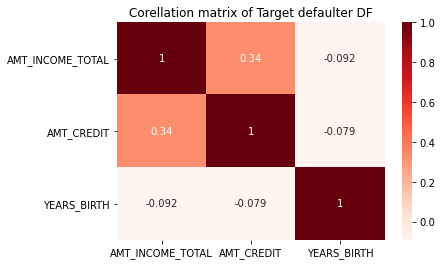

In [57]:
#------> Corellation analysis of "Income" (Column Name:"AMT_INCOME_TOTAL") "Amount credited" (Column Name: "AMT_CREDIT") and "Age" (Column Name: "YEARS_BIRTH").
#----------> Analysis done for "Target_defaulter" DF.

sns.heatmap(Target_defaulter[["AMT_INCOME_TOTAL", "AMT_CREDIT", "YEARS_BIRTH"]].corr(), annot = True, cmap = "Reds")
plt.title("Corellation matrix of Target defaulter DF")
plt.show()

**Observation**- Not much inferences can be drawn from the corellation matrix, as it seems to be normal. 
- There is not much corellation between the age and the Amount credited as the coefficient is in negative (-0.079). 
- Also the Income of the applicant is not corellated with the age of the applicant as negative corellation is observed (-0.092).
- There is some corellation between the Income and the Amount credited, though a not very high corellation (0.34). 

If we do a corellation on the main dataset ("Selected_data" DF), then also the very similar inferences is being drawn except for age and the Amount credited as the coefficient is in positive (0.055). Though there is not a veri high corellation, bot is not negative compared to pensioner data set.

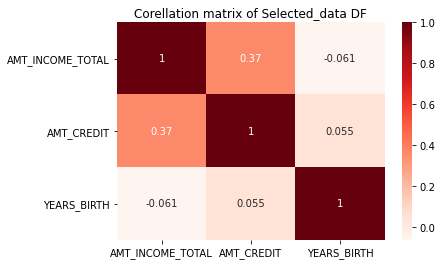

In [58]:
#------> Corellation analysis of "Income" (Column Name:"AMT_INCOME_TOTAL") "Amount credited" (Column Name: "AMT_CREDIT") and "Age" (Column Name: "YEARS_BIRTH").
#----------> Analysis done for "Selected_data" DF.

sns.heatmap(Selected_data[["AMT_INCOME_TOTAL", "AMT_CREDIT", "YEARS_BIRTH"]].corr(), annot = True, cmap = "Reds")
plt.title("Corellation matrix of Selected_data DF")
plt.show()

**Age dimension**

As already observed, the Age distrubution in the "Target_defaulter" data set is in the range of 50 to 70 years as it mainly comprises of Pensioners. 

But to check the aspect of distrubution of female defaulters, a distrubution plot is being created to check if any insights can be derived out of it. 

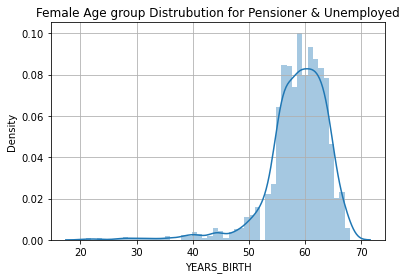

In [59]:
#-----------> Checking the Age group Distrubution of female defaulters by creating a distrubution plot using seaborn**

#--> Step 1: Filtering the details by taking only female applicants.
Target_defaulter_female = Target_defaulter[Target_defaulter["CODE_GENDER"] == "F"]

#--> Step 2: Creating a distrubution plot for defaulter Female Applicants. 

plt.title("Female Age group Distrubution for Pensioner & Unemployed")
sns.distplot(Target_defaulter_female["YEARS_BIRTH"],plt.grid(True))
plt.show()

**Observation**: As checked, not much inferences can be drawn as the distrubution is almost same as what is there for the main "pensioner/unemployed" data set "Target_defaulter".


Next question arising is the gender wise age distrubution of the defaulter applicants from the main dataset "Selected_data" to try and get any insights. 

**Pair Plot of Gender wise age distrubution defaulter applicants.**

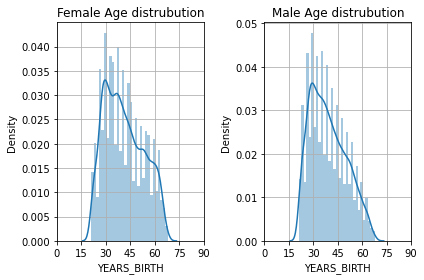

In [60]:
#--------> Pair Plot of Gender wise age distrubution defaulter applicants. Created using "Selected_data" DF. 

#---------------> Step 1 - Creating of separate filtered data sets for Male and female applicants who have defaulted: 
Selected_data_female = Selected_data[(Selected_data["CODE_GENDER"] == "F") & (Selected_data["TARGET"] == 1)]
Selected_data_male = Selected_data[(Selected_data["CODE_GENDER"] == "M") & (Selected_data["TARGET"] == 1)]

#-----------> Creating the Distrubution Plots

plt.subplot(1,2,1)
plt.title("Female Age distrubution")
sns.distplot(Selected_data_female["YEARS_BIRTH"],plt.grid(True))
ticks = np.arange(0, 100, 15)
labels = ["{}".format(i//1) for i in ticks]
plt.xticks(ticks, labels)



plt.subplot(1,2,2)
plt.title("Male Age distrubution")
sns.distplot(Selected_data_male["YEARS_BIRTH"],plt.grid(True))
ticks = np.arange(0, 100, 15)
labels = ["{}".format(i//1) for i in ticks]
plt.xticks(ticks, labels)


# --------> Adjusting and Displaying the Distrubution Plots
plt.tight_layout()
plt.show()

**Observation**:  As observed, In both the diagrams, the Applicants who have defaulted the most are in the age group of 25 - 30. 

Another interesting observation was the No of defaulters decreased as the age of applicants increased.

In [61]:
#--------------> Getting further insights on the data sets through describe function

Selected_data_female.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,Contract_Flag,EXT_SOURCE_AVG
count,14169.000000,14169.0,14169.000000,14169.000000,14169.00000,14169.000000,14151.000000,14169.000000,2603.000000,14169.0,14169.000000,14169.000000,14169.000000,14169.000000,14169.000000,14169.000000,14169.000000,14169.000000,14169.000000,14169.000000,14169.000000,14169.000000,14169.000000,14169.000000,14169.000000,6139.000000,14130.000000,11135.000000,14169.000000,14169.000000,14169.000000,14169.000000,14169.000000,14169.000000
mean,277728.720375,1.0,0.478580,0.148425,0.56114,0.025584,0.492778,0.019230,13.787553,1.0,0.841273,0.234456,0.998447,0.249841,0.051592,2.189710,2.162891,2.143412,11.769426,0.013692,0.034159,0.022655,0.109888,0.253158,0.176371,0.431465,0.415229,0.386587,41.151316,-154.778742,12.204531,6.869574,0.073611,0.301611
std,102339.433595,0.0,0.770346,0.082091,0.35154,0.012208,0.317108,0.011869,14.362330,0.0,0.365434,0.423673,0.039375,0.432936,0.221209,0.956938,0.506734,0.501873,3.246352,0.116213,0.181644,0.148807,0.312761,0.434836,0.381149,0.202200,0.213066,0.205476,11.790795,367.617763,9.405220,4.240902,0.261147,0.147116
min,100031.000000,1.0,0.000000,0.025650,0.04500,0.002723,0.045000,0.000533,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.018361,0.000006,0.000527,21.000000,-1001.000000,0.000000,0.000000,0.000000,0.000000
25%,190049.000000,1.0,0.000000,0.094500,0.28440,0.016695,0.238500,0.009657,5.000000,1.0,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,2.000000,2.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.272392,0.242780,0.218859,31.000000,0.000000,4.000000,3.000000,0.000000,0.195574
50%,276658.000000,1.0,0.000000,0.135000,0.49752,0.024376,0.450000,0.018801,11.000000,1.0,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,2.000000,2.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.413477,0.447717,0.375711,40.000000,2.000000,11.000000,7.000000,0.000000,0.292976
75%,366325.000000,1.0,1.000000,0.180000,0.75474,0.031910,0.675000,0.025164,16.000000,1.0,1.000000,0.000000,1.000000,0.000000,0.000000,3.000000,2.000000,2.000000,14.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.585617,0.597520,0.547810,50.000000,6.000000,18.000000,11.000000,0.000000,0.399424
max,456254.000000,1.0,9.000000,3.150000,4.02768,0.149211,3.600000,0.072508,65.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000,3.000000,3.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.929394,0.811870,0.874844,68.000000,44.000000,62.000000,17.000000,1.000000,0.805246


In [62]:
#--------------> Getting further insights on the data sets through describe function

Selected_data_male.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,Contract_Flag,EXT_SOURCE_AVG
count,10655.000000,10655.0,10655.000000,10655.000000,10655.000000,10655.000000,10652.000000,10655.000000,4973.000000,10655.0,10655.000000,10655.000000,10655.000000,10655.000000,10655.000000,10655.000000,10655.000000,10655.000000,10655.000000,10655.000000,10655.000000,10655.000000,10655.000000,10655.000000,10655.000000,3914.000000,10642.000000,8012.000000,10655.000000,10655.000000,10655.000000,10655.000000,10655.000000,10655.000000
mean,277092.668982,1.0,0.444111,0.177502,0.553308,0.027675,0.483919,0.018999,13.606475,1.0,0.930361,0.242328,0.997841,0.238480,0.060347,2.169967,2.141342,2.123416,11.833693,0.022431,0.084843,0.068982,0.129704,0.369122,0.281933,0.317157,0.405261,0.396487,39.121821,-65.896481,11.266729,7.173721,0.052651,0.273136
std,102437.576639,0.0,0.738244,0.091190,0.339505,0.012669,0.304172,0.011952,11.404143,0.0,0.254549,0.428512,0.046413,0.426174,0.238140,0.943753,0.502588,0.497101,3.333974,0.148087,0.278661,0.253435,0.335994,0.482590,0.449962,0.188592,0.213029,0.206144,10.958143,255.697787,8.485237,4.026399,0.223347,0.136267
min,100002.000000,1.0,0.000000,0.031500,0.045000,0.003172,0.045000,0.000533,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.014691,0.000005,0.000527,21.000000,-1001.000000,0.000000,0.000000,0.000000,0.000000
25%,189081.000000,1.0,0.000000,0.121500,0.284400,0.018477,0.238500,0.009549,7.000000,1.0,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,2.000000,2.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.167833,0.230295,0.228883,30.000000,1.000000,4.000000,4.000000,0.000000,0.174264
50%,275976.000000,1.0,0.000000,0.157500,0.495000,0.026294,0.450000,0.018634,12.000000,1.0,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,2.000000,2.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.270912,0.429562,0.387625,38.000000,2.000000,10.000000,7.000000,0.000000,0.266283
75%,365626.000000,1.0,1.000000,0.211500,0.719946,0.034909,0.675000,0.025164,17.000000,1.0,1.000000,0.000000,1.000000,0.000000,0.000000,3.000000,2.000000,2.000000,14.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.436331,0.590039,0.555392,47.000000,5.000000,17.000000,11.000000,0.000000,0.366118
max,456225.000000,1.0,11.000000,1.890000,2.961000,0.127507,2.961000,0.072508,91.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,13.000000,3.000000,3.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.891954,0.805965,0.896010,68.000000,39.000000,48.000000,16.000000,1.000000,0.778614


So the above Distrubution Plot provided an insight on the Age wise Distrubution of defaulter applicants. Now lets compare it with the age distrubution plot for all the applicants (Defaulter and non defaulters)

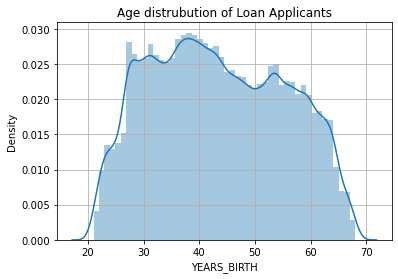

In [63]:
#----------------> Age wise distrubution plot of applicants (Derived from "Selected_data" DF)

plt.title("Age distrubution of Loan Applicants")
sns.distplot(Selected_data["YEARS_BIRTH"],plt.grid(True))
plt.show()

**Final Observation**: 

On comparing the above distrubution plots, it gives us a major insight that Applicants in the Age group of 25 to 30 have a higher chances of defaulting on the loans compared to Applicants above the age group of 30. This pnenomena is common across both the genders groups. 

This is further validated by the distrubution plot which has been done to check the Age distrubution of all the applicants wherein the no of applicants are almost equally distrubuted across all age groups and does not have a declining trend as observed in the " Pair Plot of Gender wise age distrubution defaulter applicants".

**Corellation Analysis of Defaulter Applicants**
In the Analysis a plot will be done on the below factors to find out if there is any corellation between them:

a) Income of the applicants,  

b) The Amount Credited 

c) Age of the applicants

The is being done by extracting a dataset from "Selected_data" on basis of "TARGET" = 1

In [64]:
#---------------->  Creating a data set of defaulter applicants from the mail DF "Selected_data".
Selected_data_def_MF = Selected_data[(Selected_data["TARGET"] == 1)]

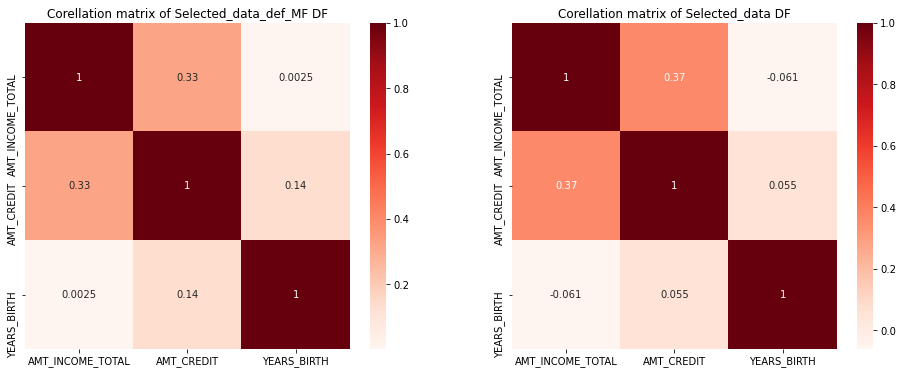

In [65]:
#------> Corellation analysis of "Income" (Column Name:"AMT_INCOME_TOTAL") "Amount credited" (Column Name: "AMT_CREDIT") and "Age" (Column Name: "YEARS_BIRTH").
#----------> Analysis done for "Selected_data_def_MF" DF and compared with "Selected_data" DF

#--------> Defining the size of the barplots.
plt.figure(figsize = [16,6])

#-----------------------> Plotting heat map for "Selected_data_def_MF"
plt.subplot(1,2,1)
sns.heatmap(Selected_data_def_MF[["AMT_INCOME_TOTAL", "AMT_CREDIT", "YEARS_BIRTH"]].corr(), annot = True, cmap = "Reds")
plt.title("Corellation matrix of Selected_data_def_MF DF")

#-----------------------> Plotting heat map for "Selected_data"
plt.subplot(1,2,2)
sns.heatmap(Selected_data[["AMT_INCOME_TOTAL", "AMT_CREDIT", "YEARS_BIRTH"]].corr(), annot = True, cmap = "Reds")
plt.title("Corellation matrix of Selected_data DF")

plt.show()

**Observation**- Based on the comparitive analysis of the Heatmap, the below insights are gained.

- There is a higher corellation between the age and the Amount credited at 0.14 in the defaulter data set as compared to 0.055 in the all applicant data set Which comprises of both Defaulter and non Defaulter.
- Also the same pnenomena is observed between the age of the applicant and "AMT_INCOME_TOTAL" the as corellation is 0.0025 in the defaulter data set as compared to -0.061 in the all applicant data set.


**Occupation Demographics**

In the analysis, the focus will be on the distrubution of the applicants on basis of their occupation profile. 

In the below steps, Analysis will be done on various aspects, starting with the occupational distrubution of applicants.

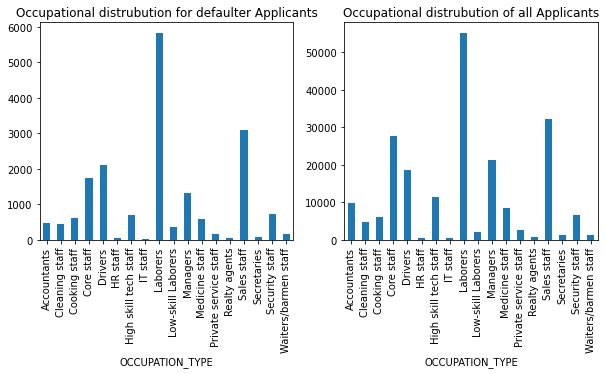

In [66]:
#--------------------> Distrubution of data on basis of the occupation of applicants.



#-----------> Creating pairplots on the occupational distrubution of applicants.

#--------> Defining the size of the barplots.
plt.figure(figsize = [10,4])

#-------------> Bar plot for occupational distrubution of Defaulter applicants
plt.subplot(1,2,1)
plt.title("Occupational distrubution for defaulter Applicants")
Selected_data_def_MF.groupby(["OCCUPATION_TYPE"])["NAME_CONTRACT_TYPE"].count().plot.bar()

#-------------> Bar plot for occupational distrubution of applicants (Defaulter/Non defaulter)
plt.subplot(1,2,2)
plt.title("Occupational distrubution of all Applicants")
Selected_data.groupby(["OCCUPATION_TYPE"])["NAME_CONTRACT_TYPE"].count().plot.bar()

#------------------> Displaying the Plots
plt.show()

**Observation**
Based on the above pairplots, the below infetences can be drawn: 

1) The five main occupational profiles who have defaulted the most are: 
               
     a) Labourers, 
      
     b) Sales Staff, 
               
     c) Drivers, 
                
     d) Core Staff, 
                
     e) Managers
     

2) In terms of applicants, the no of Core Staffs are more compared to Drivers, but when it comes to defaulting, Drivers have defaulted more compared to Core Staff.


Based on the inferences, the next step will be to dig deeper into the data to gain more insights on the behavioural patterns. so for this a new dataset **"Top5_Def_occupation"** will be created by taking into account only the occupations types who have defaulted the most. 

*Note* - The data set that will be taken into account will be "Selected_data_def_MF"

**Analysis of Top 5 Occupation type Defaulter**

In [67]:
#-------------------> Creation of a Dataset "Top5_Def_occupation".
Top5_Def_occupation = Selected_data_def_MF[(Selected_data_def_MF["OCCUPATION_TYPE"] == "Laborers") + (Selected_data_def_MF["OCCUPATION_TYPE"] == "Sales staff") +(Selected_data_def_MF["OCCUPATION_TYPE"] == "Drivers") + (Selected_data_def_MF["OCCUPATION_TYPE"] == "Core staff") + (Selected_data_def_MF["OCCUPATION_TYPE"] == "Managers")]

#--------------------> Verifying the Dataset by checking the distrubution.
Top5_Def_occupation.groupby(["OCCUPATION_TYPE"])["NAME_CONTRACT_TYPE"].count()

OCCUPATION_TYPE
Core staff     1738
Drivers        2107
Laborers       5837
Managers       1328
Sales staff    3092
Name: NAME_CONTRACT_TYPE, dtype: int64

**Result of the verification** : As checked, the data set "Top5_Def_occupation" has been created correctly with only the details of the top 5 occupation being extracted. 


**Additional Analysis**---Now if we check the total %age of Top 5 defaulter applicants in terms of occupation compared to the total defaulter appicants.

In [68]:
#-------------> Checking the %age of Top 5 defaulters applicants in terms of occupation compared to the total no of defaulters.

(Top5_Def_occupation["OCCUPATION_TYPE"].count()/Selected_data_def_MF["TARGET"].count())*100

56.80792781179503

**Result of the Analysis** : As observed, the %age of total applicants in the top 5 defaulter occupation list comprises of 56% when compared to the total defaulters. 
So filtering the dataframe of defaulters on basis of Top 5 Occupation and proceeding in further analysis is totally justified. 
    

**Verifying the Age distrubution of Defaulter applicants from "Top5_Def_occupation" dataframe**

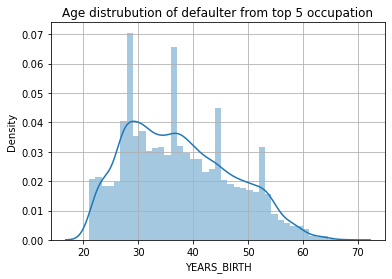

In [69]:
#-----------> Creating the age wise Distrubution Plots
plt.title("Age distrubution of defaulter from top 5 occupation")
sns.distplot(Top5_Def_occupation["YEARS_BIRTH"],plt.grid(True))

#------------------> Displaying the Plots
plt.show()

**Observation**: As observed, the no of the defaulter applicants reduces as the age of the applicants increased. This phenomena has already been identified in the previous section and not much inferences can be drawn from it. 


**Next Step**: Next check that will be done on the distrubution of defaulter applicants on basis of their "NAME_INCOME_TYPE".

**Analysis on basis of Income Type**

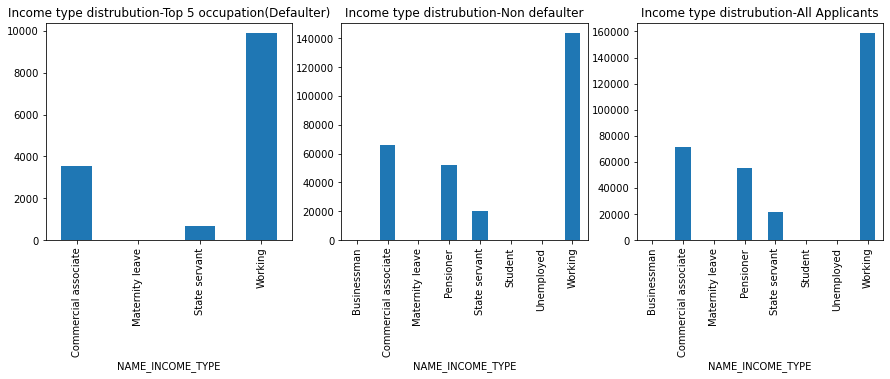

In [70]:
#--------------> Checking the distrubution of applicants on basis of their "NAME_INCOME_TYPE"

# Creating a dataset for applicants who have not defaulted (M/F)
Selected_data_nondef_MF = Selected_data[(Selected_data["TARGET"] == 0)]


#--------> Defining the size of the barplots.
plt.figure(figsize = [15,4])


#-----------> Bar plot for top 5 defaulter. Dataframe: "Top5_Def_occupation".
plt.subplot(1,3,1)
plt.title("Income type distrubution-Top 5 occupation(Defaulter)")
Top5_Def_occupation.groupby(["NAME_INCOME_TYPE"])["NAME_CONTRACT_TYPE"].count().plot.bar()


#-----------> Bar plot for Non defaulter. Dataframe: "Selected_data_nondef_MF".
plt.subplot(1,3,2)
plt.title("Income type distrubution-Non defaulter")
Selected_data_nondef_MF.groupby(["NAME_INCOME_TYPE"])["NAME_CONTRACT_TYPE"].count().plot.bar()


#-----------> Bar plot for All Applicants. Dataframe: "Selected_data".
plt.subplot(1,3,3)
plt.title("Income type distrubution-All Applicants")
Selected_data.groupby(["NAME_INCOME_TYPE"])["NAME_CONTRACT_TYPE"].count().plot.bar()

#----------------> Plotting the Chart
plt.show()

**Observation**: So from the above plots, we the below insights
    
1) The top defaulters are the "working class" followed by "Commercial Associate" and "State servant".

2) There are no pensioners in the top 5 defaulter on basis of occupation even though they are among the major chunk of applicants on basis of "Income Type".    



**Next Step** - Next analysis that will be done is to find out more about the organization where the applicants who have defaulted. 



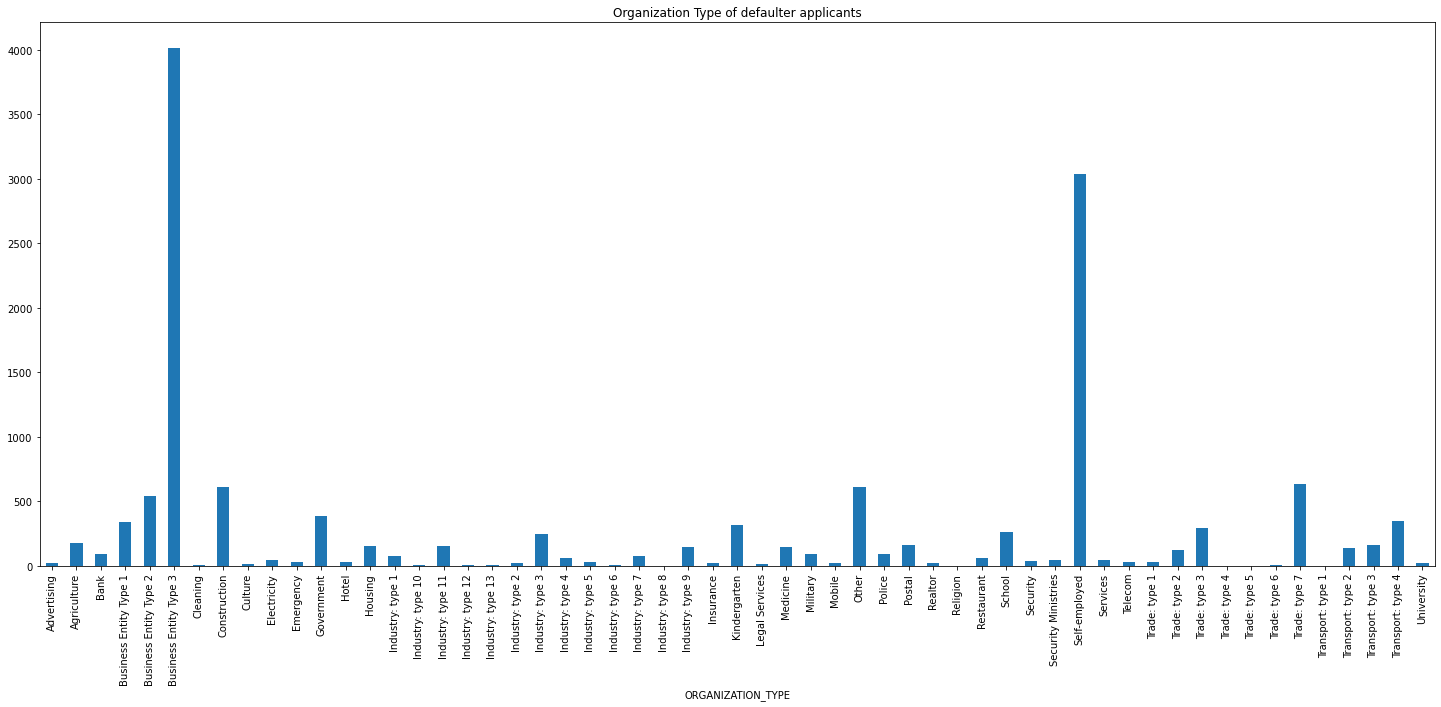

In [71]:
#--------------> Checking the distrubution of defaulter applicants on basis of their "organization type"

#--------> Defining the size of the barplots.
plt.figure(figsize = [25,10])

#-----------> Bar plot for defaulter organization type. Dataframe: "Top5_Def_occupation".
plt.title("Organization Type of defaulter applicants")
Top5_Def_occupation.groupby(["ORGANIZATION_TYPE"])["NAME_CONTRACT_TYPE"].count().plot.bar()

#----------------> Plotting the Chart
plt.show()

**Observation** As observed, the maximum no of Defaulters under the top 5 Occupation type belong to "Business Entity Type 3" and "Self Employed".

But not much insighs can be derived from it as when compared with the data as all applicants (DF:"Selected_data"), "Business Entity Type 3" have been the major applicants. 


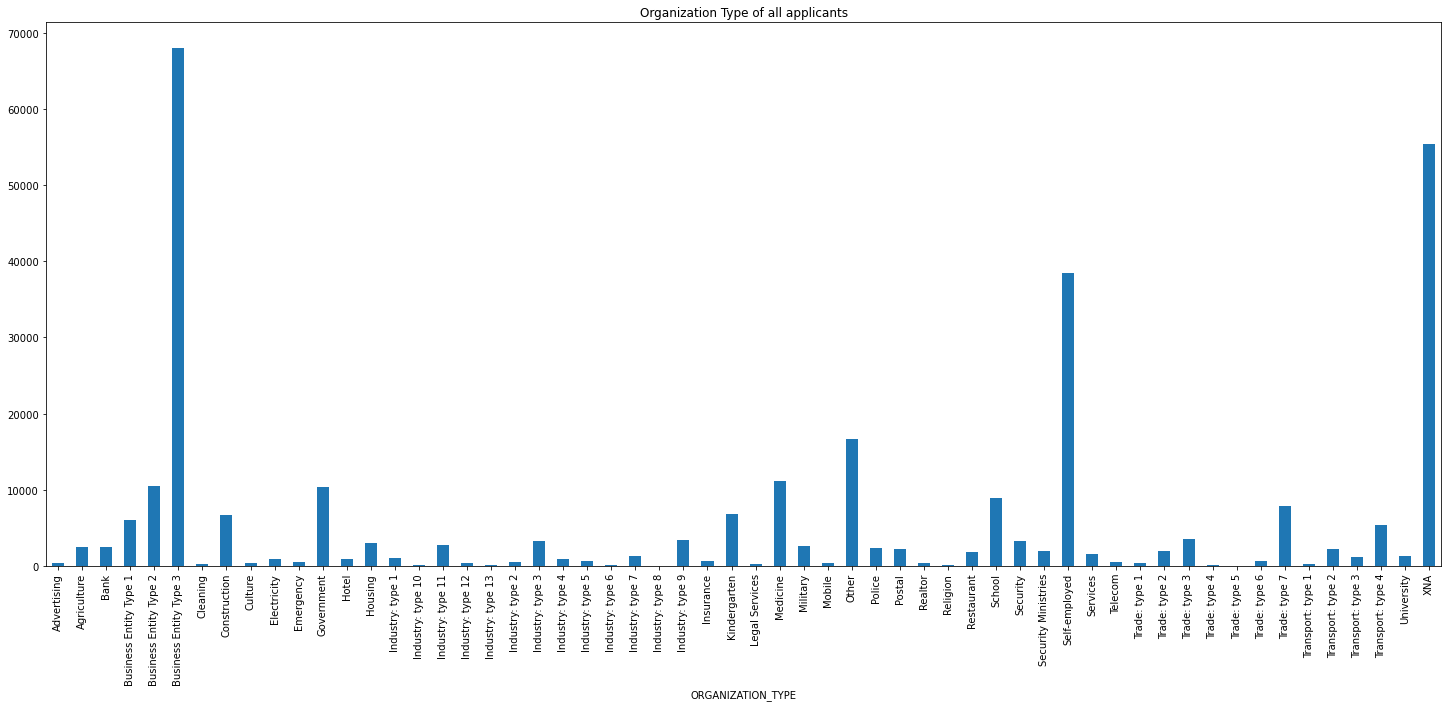

In [72]:
#--------------> Checking the distrubution of all applicants on basis of their "organization type"

#--------> Defining the size of the barplots.
plt.figure(figsize = [25,10])


#-----------> Bar plot for all applicants organization type. Dataframe: "Selected_data".
plt.title("Organization Type of all applicants")

Selected_data.groupby(["ORGANIZATION_TYPE"])["NAME_CONTRACT_TYPE"].count().plot.bar()

#----------------> Plotting the Chart
plt.show()

**Other Aspect Analysis** : Various aspects are being analysed to find if insights can be derived out of it. 

The anaysis are being done on the below aspects:
1) Applicants distrubution of the Top 5 Occupational Defaulters on basis of their "REGION_POPULATION_RELATIVE".

2) Distrubution of Applicants data Applicants on basis of family members.

3) Verifying the defaulter applicants data to check how many were contactable through mobile.

4) Checking the kind of housing where the defaulter applicants stays.

5) Verifying the details on which gender has taken the most of credit.

6) Distrubuton of Family status in the Default Applicant data.

**1 - Applicants distrubution of the Top 5 Occupational Defaulters on basis of their "REGION_POPULATION_RELATIVE"**

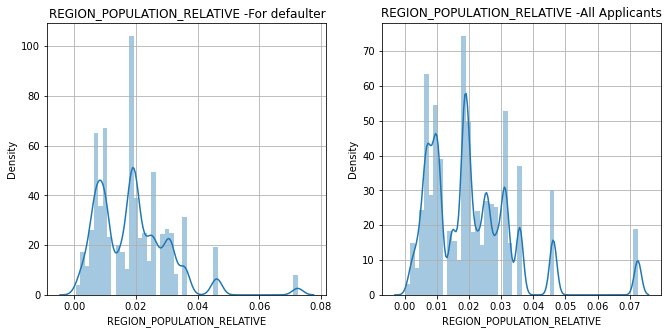

In [73]:
#---------> Applicants distrubution on basis of their "REGION_POPULATION_RELATIVE" 

#--------> Defining the size of the barplots.
plt.figure(figsize = [11, 5])


#-----------> Bar plot for defaulter applicants on basis of "REGION_POPULATION_RELATIVE". Dataframe: "Top5_Def_occupation".
plt.subplot(1,2,1)
plt.title("REGION_POPULATION_RELATIVE -For defaulter")
sns.distplot(Top5_Def_occupation["REGION_POPULATION_RELATIVE"],plt.grid(True))


#-----------> Bar plot for all applicants on basis of"REGION_POPULATION_RELATIVE". Dataframe: "Selected_data".
plt.subplot(1,2,2)
plt.title("REGION_POPULATION_RELATIVE -All Applicants")
sns.distplot(Selected_data["REGION_POPULATION_RELATIVE"],plt.grid(True))


#----------------> Plotting the Chart
plt.show()

**Observation** From the above plot, not mucg inferences can be drawn as majority of the applicants are from a location with Population relative between "0.00" to "0.003".

**2 - Distrubution of Applicants data Applicants on basis of family members.**

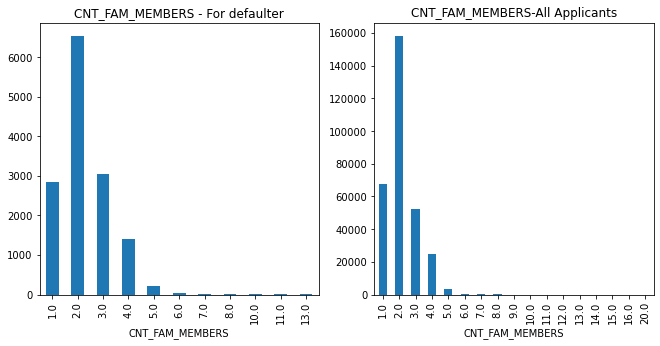

In [74]:
#---------> Applicants distrubution on basis of their "CNT_FAM_MEMBERS" 

#--------> Defining the size of the barplots.
plt.figure(figsize = [11, 5])


#-----------> Bar plot for defaulter applicants on basis of "REGION_POPULATION_RELATIVE". Dataframe: "Top5_Def_occupation".
plt.subplot(1,2,1)
plt.title("CNT_FAM_MEMBERS - For defaulter")
Top5_Def_occupation.groupby(["CNT_FAM_MEMBERS"])["NAME_CONTRACT_TYPE"].count().plot.bar()


#-----------> Bar plot for all applicants on basis of"REGION_POPULATION_RELATIVE". Dataframe: "Selected_data".
plt.subplot(1,2,2)
plt.title("CNT_FAM_MEMBERS-All Applicants")
Selected_data.groupby(["CNT_FAM_MEMBERS"])["NAME_CONTRACT_TYPE"].count().plot.bar()


#----------------> Plotting the Chart
plt.show()

**Observation** : Not much inferences can be drawn from the above chart as the no of family members distrubution is same across both the plots. 

**3 - Verifying the defaulter applicants data to check how many were contactable through mobile.** -

In [75]:
#--------------> Verifying the defaulter applicants data to check how many were contactable through mobile.
Top5_Def_occupation.groupby(["FLAG_CONT_MOBILE"])["NAME_CONTRACT_TYPE"].count()

FLAG_CONT_MOBILE
0       30
1    14072
Name: NAME_CONTRACT_TYPE, dtype: int64

**Observation**: Not much insights can be gained from this as majority of the users were contactable. 

**4 - Checking the kind of housing where the defaulter applicants stays.**

In [76]:
# --------------> Checking the kind of housing where the defaulter applicants stays.
Top5_Def_occupation.groupby(["NAME_HOUSING_TYPE"])["NAME_CONTRACT_TYPE"].count()

NAME_HOUSING_TYPE
Co-op apartment           47
House / apartment      11945
Municipal apartment      518
Office apartment          89
Rented apartment         388
With parents            1115
Name: NAME_CONTRACT_TYPE, dtype: int64

<AxesSubplot:ylabel='NAME_CONTRACT_TYPE'>

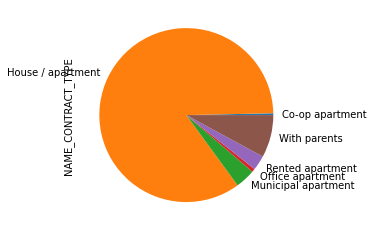

In [77]:
# --------------> Checking the kind of housing where the defaulter applicants stays in terms of diagram
Top5_Def_occupation.groupby(["NAME_HOUSING_TYPE"])["NAME_CONTRACT_TYPE"].count().plot.pie()

**Observation** : Not much inferences can be drawn as no abnormality observed in the data. 

**5- Verifying the details on which gender has taken the most of credit**

<AxesSubplot:xlabel='CODE_GENDER', ylabel='AMT_CREDIT'>

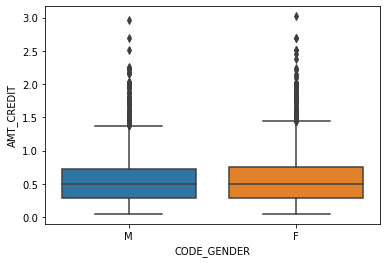

In [78]:
# Verifying the details on which gender has taken the most of credit 
sns.boxplot(x = 'CODE_GENDER', y = "AMT_CREDIT", data =Top5_Def_occupation)

**Observation**: As checked, the pattern for both the genders same without much differences.

**6 - Distrubuton of Family status in the Default Applicant data**

<AxesSubplot:xlabel='NAME_FAMILY_STATUS'>

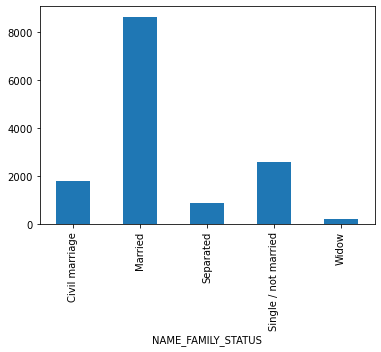

In [79]:
Top5_Def_occupation.groupby(["NAME_FAMILY_STATUS"])["NAME_CONTRACT_TYPE"].count().plot.bar()

**Observation**: Married and single/Not Married are most likely to default compared to "Widow" or "Separated"

From the rest of the analysis of multiple aspects, not much conclusions can be drawn.

**Next Action**: Next Action will be analysing the "Normalized score" data of the Applicants to check if any insights can be derived from it. 

**Analysis of the Normalized Score Data of Applicants**

- In the Below Analysis, the Normalised score which has been calculated in "EXT_SOURCE_AVG" will be the focus of further analysis. 

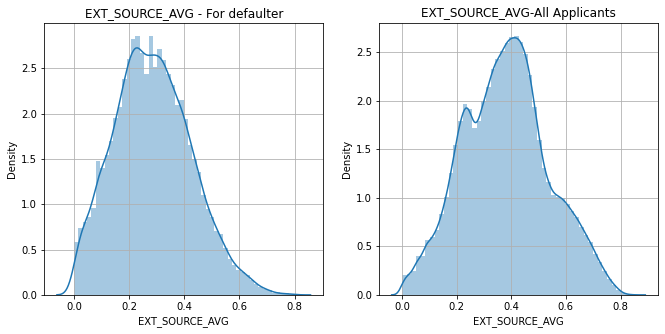

In [80]:
#---------> Applicants distrubution on basis of their "Normalized score". Column :"EXT_SOURCE_AVG".

#--------> Defining the size of the Dist Plots.
plt.figure(figsize = [11, 5])


#-----------> Dist plot for defaulter applicants on basis of "EXT_SOURCE_AVG" (Normalised Score). Dataframe: "Top5_Def_occupation".
plt.subplot(1,2,1)
plt.title("EXT_SOURCE_AVG - For defaulter")
sns.distplot(Top5_Def_occupation["EXT_SOURCE_AVG"],plt.grid(True))

#-----------> Dist plot for defaulter applicants on basis of "EXT_SOURCE_AVG" (Normalised Score). Dataframe: "Selected_data".
plt.subplot(1,2,2)
plt.title("EXT_SOURCE_AVG-All Applicants")
sns.distplot(Selected_data["EXT_SOURCE_AVG"],plt.grid(True))



#----------------> Plotting the Chart
plt.show()

**Observation**: From the The distrubution of the normalised score of the defaulter applicants are in the range of 0.2-0.3. 
Whereas Normalised score of all the applicants are in the range of 0.2, 0.4 being the majority and some applicants in 0.6 range. 


So from this we get an insight that the applicants who have a normalised score of 0.2 - 0.3 will have greater possibility of defaulting. 


**Next Action** : Next activity which is being done is understanding the gender wise distrubution of Normalised data using box plots.

**Gender wise distrubution of Normalised data using box plots.**

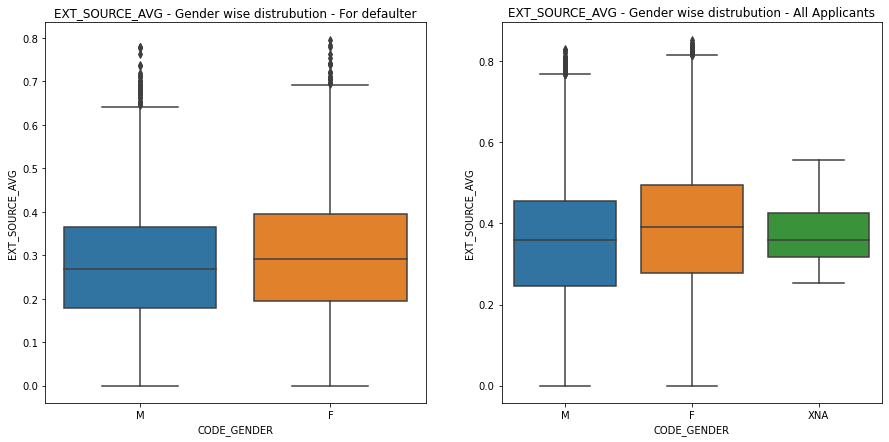

In [81]:
#---------> Applicants distrubution on basis of their "Normalized score". Column :"EXT_SOURCE_AVG".

#--------> Defining the size of the Dist Plots.
plt.figure(figsize = [15, 7])


#-----------> Dist plot for defaulter applicants on basis of "EXT_SOURCE_AVG" (Normalised Score). Dataframe: "Top5_Def_occupation".
plt.subplot(1,2,1)
plt.title("EXT_SOURCE_AVG - Gender wise distrubution - For defaulter")
sns.boxplot(x = 'CODE_GENDER', y = "EXT_SOURCE_AVG", data =Top5_Def_occupation)

#-----------> Dist plot for defaulter applicants on basis of "EXT_SOURCE_AVG" (Normalised Score). Dataframe: "Selected_data".
plt.subplot(1,2,2)
plt.title("EXT_SOURCE_AVG - Gender wise distrubution - All Applicants")
sns.boxplot(x = 'CODE_GENDER', y = "EXT_SOURCE_AVG", data=Selected_data)


#----------------> Plotting the Chart
plt.show()

**Observation**: As checked, The Box plot distrubution doesnot have much differences, and not much insights can be drawn from the same

# Analysis of Applicants Data on basis of Historical Data set

In the analysis, the Applicants data is being analysed by including the historical data. 

**Activity** - The analysis will be done by creating a new data set which will a outer join of "previous_application" and "Selected_data". 

The objective behind doing a outer join is to get a clear id on the no of applicants who have applied for the first time. 


**Preparatory Action**: Before the joining activity is initiated, a basic review and Data cleaning procedure will performed on the "previous_application" DF.


# Data Cleaning Procedures for previous_application DF

As observed from the early inspection of previous_application the datasets, there is no need to drop any Rows or columns at this stage as it is not clear which data might be required for the analysis. Rather a separate data frame will be created with the requisite columns to proceed with the analysis.

For the creation of separate DF, an Null value analysis will be performed on the Data set.

In [82]:
#--------> Checking the percentage of Null Values in the Dataframe "previous_application"

previous_application.isnull().sum() / previous_application.shape[0] * 100.00

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

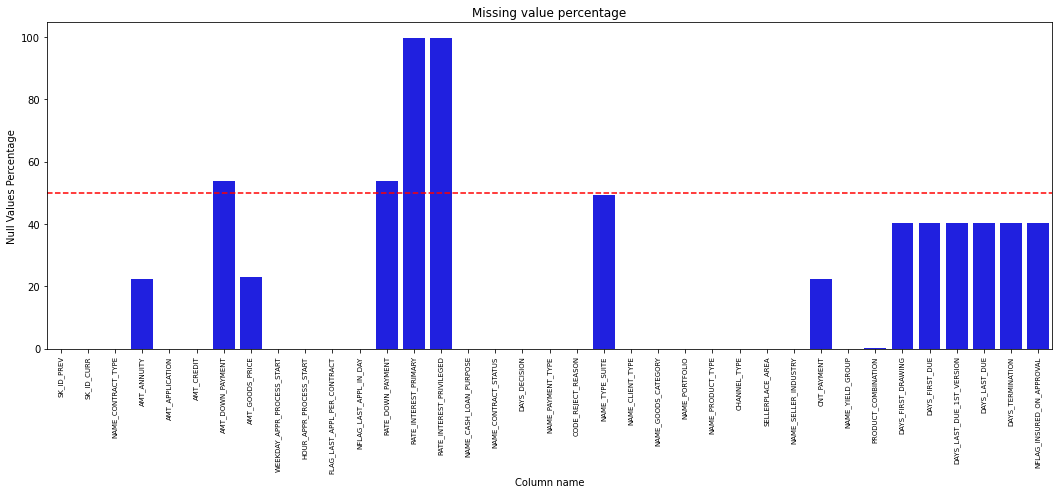

In [83]:
#--------> graphical representation of percentage of null values in dataframe 'previous_DF'
#--------> columns Vs missing value percentage with 50% being the cutoff
nullDF2 = pd.DataFrame((previous_application.isnull().sum())*100/previous_application.shape[0]).reset_index()
nullDF2.columns = ['Column name', 'Null Values Percentage']
fig = plt.figure(figsize=(18,6))
ax = sns.barplot(x="Column name",y="Null Values Percentage",data=nullDF2,color='blue')
plt.xticks(rotation =90,fontsize =7)
ax.axhline(50, ls='--',color='red')
plt.title("Missing value percentage")

plt.show()

In [84]:
#---------------> Verifying the column with null values more than 50%

len(nullDF2[nullDF2["Null Values Percentage"]>=50])

4

**Observation**: columns which have more than 50% of missing values are marked above red line.

The values having equal to or more that 50% is being droped-- ie, 4 columns.

## Creation of a New Data frame with Requisite columns. 

Based on the "null" Values identified in "previous_data", a new Dataframe is created and has been named as "Selected_previous".

In [85]:
#-------> finding columans that have high percentage of missing values
high_missing = nullDF2[nullDF2["Null Values Percentage"]>=50]
high_missing

,Column name,Null Values Percentage
6,AMT_DOWN_PAYMENT,53.636480
12,RATE_DOWN_PAYMENT,53.636480
13,RATE_INTEREST_PRIMARY,99.643698
14,RATE_INTEREST_PRIVILEGED,99.643698


**Observation** : 4 columns have high null value percentage of 50% and above, so droping them for further analysis seems to be reasonalble

In [86]:
#------> droping columns that have high percentage of missing values

high_missing_columns = high_missing["Column name"].tolist()
Selected_previous=previous_application.drop(labels=high_missing_columns,axis=1)

#----------> Reviewing "Selected_previous".

Selected_previous.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,1,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,1,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Y,1,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,MONDAY,7,Y,1,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Y,1,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [87]:
#----------> Inspecting the Dimension of the "Selected_previous" DF
Selected_previous.shape

(1670214, 33)

**Observation** : As observed, the No of columms have been trimmed down to 33 columns with the 1670214 rows with an intention to only focus on the requisite details. 

In [88]:
Selected_previous.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 33 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_GOODS_PRICE              1284699 non-null  float64
 7   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 8   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 9   FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 10  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 11  NAME_CASH_LOAN_PURPOSE       1670214 non-null  object 
 12  NAME_CONTRACT_STATUS         1670214 non-n

**observation** the number of columns in 'Selected_previous' DF got reduced to 33

# Analysis of Applicants Data on basis of Historical Data set

In the analysis, the Applicants data is being analysed by including the historical data. 

**Activity** - The analysis will be done by creating a new data set which will a outer join of "Selected_previous" and "Selected_data". 

The objective behind doing a outer join is to get a clear id on the no of applicants who have applied for the first time. 



In [89]:
#-----> Creating a new Data set "Historical_data" by Merging "previous_application" with the "Selected_data" using "outer" join.

Historical_data = pd.merge(Selected_data,Selected_previous, on = "SK_ID_CURR", how = "outer",suffixes='_x')

#------------> Reviewing the Dataset "Historical_data".
Historical_data.head()


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_,AMT_ANNUITY_,AMT_GOODS_PRICE_,NAME_TYPE_SUITE_,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_,HOUR_APPR_PROCESS_START_,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,Contract_Flag,EXT_SOURCE_AVG,SK_ID_PREV,NAME_CONTRACT_TYPEx,AMT_ANNUITYx,AMT_APPLICATION,AMT_CREDITx,AMT_GOODS_PRICEx,WEEKDAY_APPR_PROCESS_STARTx,HOUR_APPR_PROCESS_STARTx,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITEx,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1.0,Cash loans,M,N,Y,0.0,0.2025,0.406598,0.024701,0.3510,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,NaN,1.0,1.0,0.0,1.0,1.0,0.0,Laborers,1.0,2.0,2.0,WEDNESDAY,10.0,0.0,0.0,0.0,0.0,0.0,0.0,Business Entity Type 3,0.083037,0.262949,0.139376,25.0,1.0,9.0,5.0,0.0,0.161787,1038818.0,Consumer loans,9251.775,179055.0,179055.0,179055.0,SATURDAY,9.0,Y,1.0,XAP,Approved,-606.0,XNA,XAP,NaN,New,Vehicles,POS,XNA,Stone,500.0,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,100003,0.0,Cash loans,F,N,N,0.0,0.2700,1.293502,0.035699,1.1295,Family,State servant,Higher education,Married,House / apartment,0.003541,NaN,1.0,1.0,0.0,1.0,1.0,0.0,Core staff,2.0,1.0,1.0,MONDAY,11.0,0.0,0.0,0.0,0.0,0.0,0.0,School,0.311267,0.622246,NaN,45.0,3.0,3.0,0.0,0.0,0.311171,1810518.0,Cash loans,98356.995,900000.0,1035882.0,900000.0,FRIDAY,12.0,Y,1.0,XNA,Approved,-746.0,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1.0,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
2,100003,0.0,Cash loans,F,N,N,0.0,0.2700,1.293502,0.035699,1.1295,Family,State servant,Higher education,Married,House / apartment,0.003541,NaN,1.0,1.0,0.0,1.0,1.0,0.0,Core staff,2.0,1.0,1.0,MONDAY,11.0,0.0,0.0,0.0,0.0,0.0,0.0,School,0.311267,0.622246,NaN,45.0,3.0,3.0,0.0,0.0,0.311171,2636178.0,Consumer loans,64567.665,337500.0,348637.5,337500.0,SUNDAY,17.0,Y,1.0,XAP,Approved,-828.0,Cash through the bank,XAP,Family,Refreshed,Furniture,POS,XNA,Stone,1400.0,Furniture,6.0,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0
3,100003,0.0,Cash loans,F,N,N,0.0,0.2700,1.293502,0.035699,1.1295,Family,State servant,Higher education,Married,House / apartment,0.003541,NaN,1.0,1.0,0.0,1.0,1.0,0.0,Core staff,2.0,1.0,1.0,MONDAY,11.0,0.0,0.0,0.0,0.0,0.0,0.0,School,0.311267,0.622246,NaN,45.0,3.0,3.0,0.0,0.0,0.311171,2396755.0,Consumer loans,6737.310,68809.5,68053.5,68809.5,SATURDAY,15.0,Y,1.0,XAP,Approved,-2341.0,Cash through the bank,XAP,Family,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200.0,Consumer electronics,12.0,middle,POS household with interest,365243.0,-2310.0,-1980.0,-1980.0,-1976.0,1.0
4,100004,0.0,Revolving loans,M,Y,Y,0.0,0.0675,0.135000,0.006750,0.1350,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,26.0,1.0,1.0,1.0,1.0,1.0,0.0,Laborers,1.0,2.0,2.0,MONDAY,9.0,0.0,0.0,0.0,0.0,0.0,0.0,Government,NaN,0.555912,0.729567,52.0,0.0,11.0,6.0,1.0,0.428493,1564014.0,Consumer loans,5357.250,24282.0,20106.0,24

In [90]:
Historical_data.shape

(1686668, 78)

**Result of the review** - The dataset "Historical_data" has been created as per requirement with 78 columns created by merging the dataset of "Selected_data" and "Selected_previous".

Next step is to check the Info of the data set.

In [91]:
#-------------> Checking the info of the data set.

Historical_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1686668 entries, 0 to 1686667
Data columns (total 78 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_CURR                   1686668 non-null  int64  
 1   TARGET                       1430142 non-null  float64
 2   NAME_CONTRACT_TYPE_          1430142 non-null  object 
 3   CODE_GENDER                  1430142 non-null  object 
 4   FLAG_OWN_CAR                 1430142 non-null  object 
 5   FLAG_OWN_REALTY              1430142 non-null  object 
 6   CNT_CHILDREN                 1430142 non-null  float64
 7   AMT_INCOME_TOTAL             1430142 non-null  float64
 8   AMT_CREDIT_                  1430142 non-null  float64
 9   AMT_ANNUITY_                 1430049 non-null  float64
 10  AMT_GOODS_PRICE_             1428923 non-null  float64
 11  NAME_TYPE_SUITE_             1426111 non-null  object 
 12  NAME_INCOME_TYPE             1430142 non-n

**Observation:** AS Observed in the "info" of the "Historical_data dataset, the no of rows in "SK_ID_PREV" column (ID of previous credit) is less than then no of rows in "SK_ID_CURR" (Application id of current loan).                

This is a clear indicator that there are applicants who have applied for the 1st time and do not have any historical data available. 

**Next step** - The next activity before the analysis cam be started is to identify the null data and create a separate data set.

In [92]:
Applicants_1st_time = Historical_data[Historical_data.SK_ID_PREV.isnull()]
len(Applicants_1st_time)

16454

**Observation**: As observed, the no of Applicants with no previous history is 16454. 
    |
**Course of Action** - In the next course of action, since there are two data sets, 1st being the data of applicants who have applied previously, and the next is the dataset who are applying for the first time.

So the analysis will be done on both the data sets to get certain insights on the credit analysis.

# Analysis of "Applicants_1st_time" data set. 

The data set comprises of applicants who have applied for the 1st time. The Analysis will be intended to get more insights on the dataset.

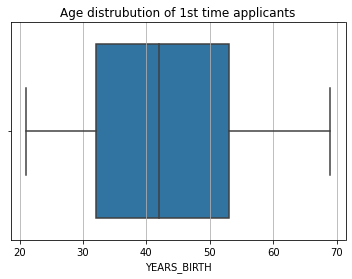

In [93]:
#---> Analysing the Age distrubution of 1st time applicants. 
sns.boxplot(Applicants_1st_time["YEARS_BIRTH"],plt.grid(True))
plt.title("Age distrubution of 1st time applicants")
plt.show()

In [94]:
#----------> Checking the Min, Max and Median Age groups. 

Applicants_1st_time.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_,AMT_ANNUITY_,AMT_GOODS_PRICE_,REGION_POPULATION_RELATIVE,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START_,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,Contract_Flag,EXT_SOURCE_AVG,SK_ID_PREV,AMT_ANNUITYx,AMT_APPLICATION,AMT_CREDITx,AMT_GOODS_PRICEx,HOUR_APPR_PROCESS_STARTx,NFLAG_LAST_APPL_IN_DAY,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,16454.000000,16454.000000,16454.000000,16454.000000,16454.000000,16454.000000,16443.000000,16454.000000,6086.000000,16454.000000,16454.000000,16454.000000,16454.000000,16454.000000,16454.000000,16452.000000,16454.000000,16454.000000,16454.000000,16454.000000,16454.000000,16454.000000,16454.000000,16454.000000,16454.000000,6915.000000,16374.000000,12677.000000,16454.000000,16454.000000,16454.000000,16454.000000,16454.000000,16454.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,277521.741461,0.059560,0.317430,0.198312,0.742696,0.029191,0.677615,0.024328,8.574762,0.999939,0.830619,0.200924,0.977209,0.257141,0.031482,2.020484,1.932843,1.913577,12.825635,0.031239,0.078097,0.054516,0.080163,0.210587,0.156740,0.512805,0.541971,0.522395,42.761760,-164.893461,12.749666,7.805458,0.175641,0.385776,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,101964.509784,0.236677,0.635517,0.174441,0.540755,0.020153,0.509119,0.016859,8.429937,0.007796,0.375100,0.400703,0.149241,0.437071,0.174621,0.844412,0.527767,0.516847,3.209350,0.173967,0.268332,0.227039,0.271553,0.407738,0.363567,0.214416,0.184341,0.194266,12.323182,377.463065,9.842428,4.081587,0.380526,0.157312,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,100024.000000,0.000000,0.000000,0.027000,0.045000,0.002876,0.045000,0.000938,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.019495,0.000012,0.000527,21.000000,-1001.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,188945.750000,0.000000,0.000000,0.112500,0.315000,0.015549,0.270000,0.010556,3.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,2.000000,2.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.340464,0.439509,0.384207,32.000000,0.000000,4.000000,4.000000,0.000000,0.269600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,276298.500000,0.000000,0.000000,0.157500,0.598401,0.024314,0.508500,0.020246,6.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,2.000000,2.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.520329,0.592235,0.551381,42.000000,2.000000,11.000000,9.000000,0.000000,0.388819,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,364717.000000,0.000000,0.000000,0.225000,0.993082,0.036931,0.900000,0.030755,12.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,2.000000,2.000000,2.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.692870,0.683022,0.678568,53.000000,6.000000,20.000000,11.000000,0.000000,0.482501,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,456229.000000,1.000000,6.000000,9.000000,4.050000,0.258026,4.050000,0.072508,65.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,3.000000,3.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.942680,0.855000,0.882530,69.000000,45.000000,65.000000,17.000000,1.000000,0.834570,NaN,NaN,N

**Observation**: As observed, the distrubution of applicants are Distrubuted across all age groups starting from 21 years to 69 years. The median being at 42 years.

Other Aspects which are checked for the Data set "Applicants_1st_time"

Percentage of defaulters for first time applicants

In [95]:
#--------------> Identifying the percentage of defaulter among 1st time applicants.
Applicants_1st_time.TARGET.value_counts()

0.0    15474
1.0      980
Name: TARGET, dtype: int64

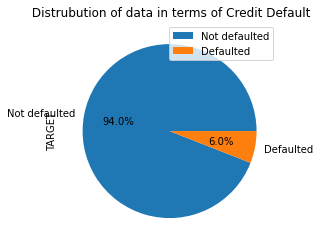

In [96]:
#--------------> Identifying the percentage of defaulter among 1st time applicants.

TARGET_1sttime = pd.DataFrame(Applicants_1st_time.TARGET.value_counts(normalize = True)*100)
TARGET_1sttime.rename(index = {0: "Not defaulted", 1 : "Defaulted"}, inplace = True)
TARGET_1sttime.plot.pie(y = "TARGET", title = " Distrubution of data in terms of Credit Default",autopct = "%1.1f%%")
plt.show()

As observed, the %age of defaulter among first time applicants is 6% out of total 1st time applicants of 16454.

on further analysing the gender distrubution among 1st time applicants. 

**Retrieving the gender wise distrubution of 1st Time applicants.**

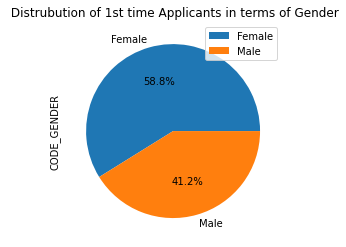

In [97]:
#----------> Retrieving the gender wise distrubution of 1st Time applicants.

gender_1sttime = pd.DataFrame(Applicants_1st_time.CODE_GENDER.value_counts(normalize = True)*100)
gender_1sttime.rename(index = {"F": "Female", "M" : "Male", "XNA" : "Not mentioned"}, inplace = True)
gender_1sttime.plot.pie(y = "CODE_GENDER", title = " Distrubution of 1st time Applicants in terms of Gender",autopct = "%1.1f%%")
plt.show()

In [98]:
Applicants_1st_time.CODE_GENDER.value_counts()

F    9683
M    6771
Name: CODE_GENDER, dtype: int64

**Checking the genderwise distrubution of 1st time Applicant - defaulters**

In [99]:
#-----------> Checking the genderwise distrubution of 1st time Applicant - defaulters 

defaulter = Applicants_1st_time[Applicants_1st_time["TARGET"]==1]
defaulter.CODE_GENDER.value_counts(normalize = True)

defaulter.CODE_GENDER.value_counts()

F    526
M    454
Name: CODE_GENDER, dtype: int64

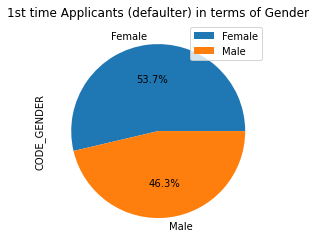

In [100]:
#-----------> Checking the genderwise % age distrubution of 1st time Applicant - defaulters 

defaulter_gender = pd.DataFrame(defaulter.CODE_GENDER.value_counts(normalize = True)*100)
defaulter_gender.rename(index = {"F": "Female", "M" : "Male", "XNA" : "Not mentioned"}, inplace = True)
defaulter_gender.plot.pie(y = "CODE_GENDER", title = "1st time Applicants (defaulter) in terms of Gender",autopct = "%1.1f%%")
plt.show()


**Observation** As observed, there are more female applicants who have applied for 1st time compared make applicants. 

Females applicants comprise of 54% of the total data of 16454 applicants, and males comprise of 46%.

**Distrubution of Applicants in terms of Income Type.**

In [101]:
#--------------> Reviewing the distrubution of 1 st time Applicants on basis of their income type. 

NAME_INCOME_TYPE_count = Applicants_1st_time.NAME_INCOME_TYPE.value_counts()
NAME_INCOME_TYPE_count

Working                 6524
Commercial associate    6082
Pensioner               2779
State servant           1044
Businessman               10
Unemployed                 6
Student                    6
Maternity leave            3
Name: NAME_INCOME_TYPE, dtype: int64

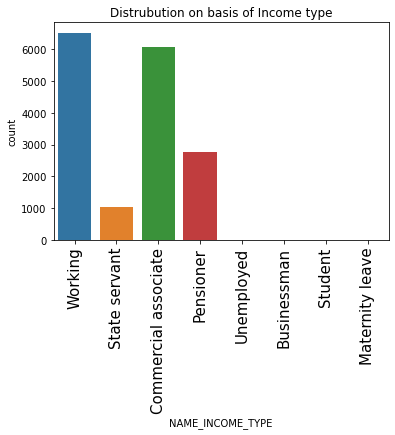

In [102]:
#---------------------> Finding the distrubution of 1 st time Applicants on basis of their income type.
sns.countplot(Applicants_1st_time.NAME_INCOME_TYPE)
plt.xticks(rotation = 90, fontsize = 15 )
plt.title("Distrubution on basis of Income type")
plt.show()

**Observation:** As observed, the 1st time applicants mostly comprise of working and commercial associate at 40% and 37% respectively, thus with a combined contrubution of 77% to the total dataset. This is followed by pensioner at 16% and the rest 7% comprise of Businessman, student, unemployed, and under Maternity leave.

<AxesSubplot:xlabel='EXT_SOURCE_AVG', ylabel='Density'>

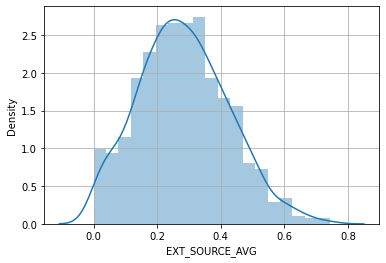

In [103]:
sns.distplot(defaulter["EXT_SOURCE_AVG"],plt.grid(True))

Not much insights are being gained from this. 

<AxesSubplot:xlabel='NAME_FAMILY_STATUS'>

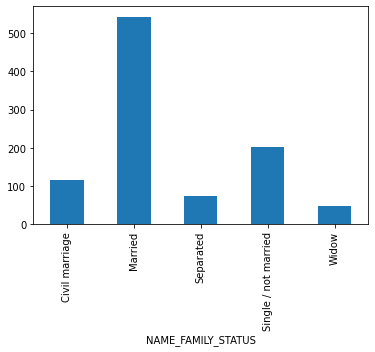

In [104]:
defaulter.groupby(["NAME_FAMILY_STATUS"])["NAME_CONTRACT_TYPE_"].count().plot.bar()

**Analysis of previous Application data.**

DF Used - "Historical_data"

In the Analysis, the historical data set is analysed on multiple aspects to get insight on the data.

In [105]:
#-------> inspecting Historical_data
Historical_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1686668 entries, 0 to 1686667
Data columns (total 78 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_CURR                   1686668 non-null  int64  
 1   TARGET                       1430142 non-null  float64
 2   NAME_CONTRACT_TYPE_          1430142 non-null  object 
 3   CODE_GENDER                  1430142 non-null  object 
 4   FLAG_OWN_CAR                 1430142 non-null  object 
 5   FLAG_OWN_REALTY              1430142 non-null  object 
 6   CNT_CHILDREN                 1430142 non-null  float64
 7   AMT_INCOME_TOTAL             1430142 non-null  float64
 8   AMT_CREDIT_                  1430142 non-null  float64
 9   AMT_ANNUITY_                 1430049 non-null  float64
 10  AMT_GOODS_PRICE_             1428923 non-null  float64
 11  NAME_TYPE_SUITE_             1426111 non-null  object 
 12  NAME_INCOME_TYPE             1430142 non-n

In [106]:
#-----------> Renaming of some columns
Historical_data = Historical_data.rename({'NAME_CONTRACT_TYPE_' : 'NAME_CONTRACT_TYPE','AMT_CREDIT_':'AMT_CREDIT','AMT_ANNUITY_':'AMT_ANNUITY',
                         'WEEKDAY_APPR_PROCESS_START_' : 'WEEKDAY_APPR_PROCESS_START',
                         'HOUR_APPR_PROCESS_START_':'HOUR_APPR_PROCESS_START','NAME_CONTRACT_TYPEx':'NAME_CONTRACT_TYPE_PREV',
                         'AMT_CREDITx':'AMT_CREDIT_PREV','AMT_ANNUITYx':'AMT_ANNUITY_PREV',
                         'WEEKDAY_APPR_PROCESS_STARTx':'WEEKDAY_APPR_PROCESS_START_PREV',
                         'HOUR_APPR_PROCESS_STARTx':'HOUR_APPR_PROCESS_START_PREV',
                         'AMT_GOODS_PRICEx':'AMT_GOODS_PRICE_PREV','AMT_GOODS_PRICEx':'AMT_GOODS_PRICE_PREV','NAME_TYPE_SUITEx':'NAME_TYPE_SUITE_PREV'}, axis=1)

In [107]:
# -----------> Removing unwanted columns for analysis

Historical_data.drop(['SK_ID_CURR','WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START','REG_REGION_NOT_LIVE_REGION', 
              'REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
              'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY','WEEKDAY_APPR_PROCESS_START_PREV',
              'HOUR_APPR_PROCESS_START_PREV', 'FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY','FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL'],axis=1,inplace=True)

In [108]:
#-------------> Checking the info of the data set to review renaming.

Historical_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1686668 entries, 0 to 1686667
Data columns (total 59 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   TARGET                       1430142 non-null  float64
 1   NAME_CONTRACT_TYPE           1430142 non-null  object 
 2   CODE_GENDER                  1430142 non-null  object 
 3   FLAG_OWN_CAR                 1430142 non-null  object 
 4   FLAG_OWN_REALTY              1430142 non-null  object 
 5   CNT_CHILDREN                 1430142 non-null  float64
 6   AMT_INCOME_TOTAL             1430142 non-null  float64
 7   AMT_CREDIT                   1430142 non-null  float64
 8   AMT_ANNUITY                  1430049 non-null  float64
 9   AMT_GOODS_PRICE_             1428923 non-null  float64
 10  NAME_TYPE_SUITE_             1426111 non-null  object 
 11  NAME_INCOME_TYPE             1430142 non-null  object 
 12  NAME_EDUCATION_TYPE          1430142 non-n

In [109]:
#----------> Bifurcating the Historical_data dataframe based on Target value 0 and 1 for correlation and other analysis
cols_for_correlation= Historical_data.columns.tolist()
Repayer_df = Historical_data.loc[Historical_data['TARGET']==0, cols_for_correlation] # Repayers
Defaulter_df = Historical_data.loc[Historical_data['TARGET']==1, cols_for_correlation] # Defaulters

**Analysing the corellation of numerical values**

In [110]:
#---------> Getting the top 10 correlation for the Repayers data
corr_repayer = Repayer_df.corr()
corr_repayer = corr_repayer.where(np.triu(np.ones(corr_repayer.shape),k=1).astype(np.bool))
corr_df_repayer = corr_repayer.unstack().reset_index()
corr_df_repayer.columns =['VAR1','VAR2','Correlation']
corr_df_repayer.dropna(subset = ["Correlation"], inplace = True)
corr_df_repayer["Correlation"]=corr_df_repayer["Correlation"].abs() 
corr_df_repayer.sort_values(by='Correlation', ascending=False, inplace=True) 
corr_df_repayer.head(10)

,VAR1,VAR2,Correlation
838,AMT_GOODS_PRICE_PREV,AMT_APPLICATION,0.999888
839,AMT_GOODS_PRICE_PREV,AMT_CREDIT_PREV,0.993300
173,AMT_GOODS_PRICE_,AMT_CREDIT,0.986683
804,AMT_CREDIT_PREV,AMT_APPLICATION,0.975726
349,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.944635
1119,DAYS_TERMINATION,DAYS_LAST_DUE,0.926829
273,CNT_FAM_MEMBERS,CNT_CHILDREN,0.878167
837,AMT_GOODS_PRICE_PREV,AMT_ANNUITY_PREV,0.821029
803,AMT_CREDIT_PREV,AMT_ANNUITY_PREV,0.816547
769,AMT_APPLICATION,AMT_ANNUITY_PREV,0.809025


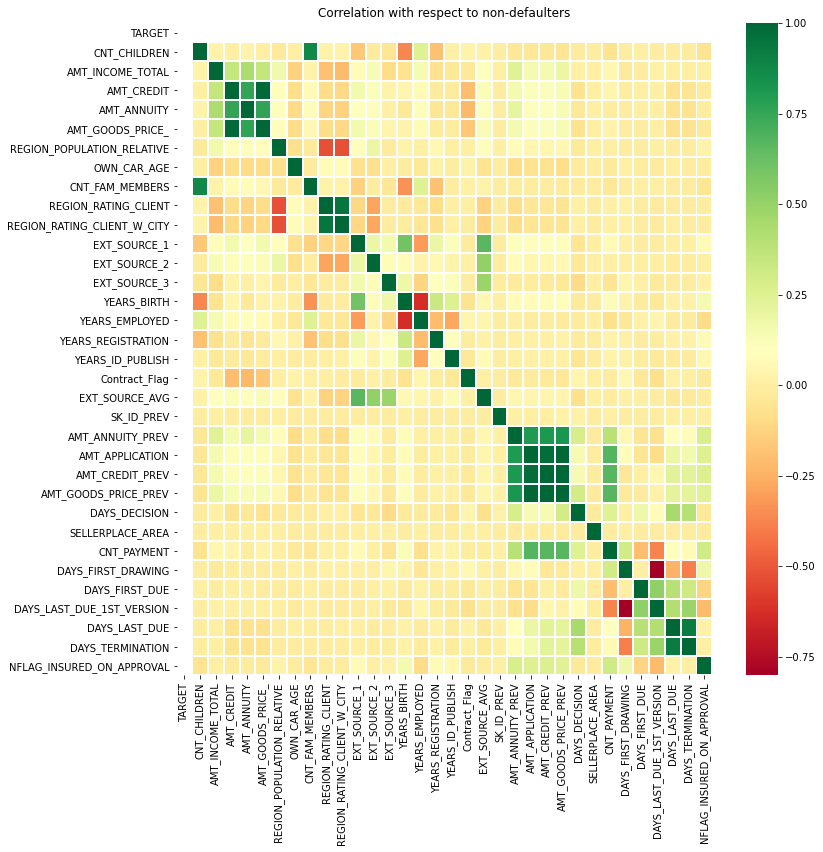

In [111]:
fig = plt.figure(figsize=(12,12))
plt.title('Correlation with respect to non-defaulters')
ax = sns.heatmap(Repayer_df.corr(), cmap="RdYlGn",annot=False,linewidth =1)

**observation**:

Correlating factors amongst repayers:

Credit amount in application details as will as historically is highly correlated with

  1.amount of goods price
  2.loan annuity
  3.total income

DAYS_LAST_DUE_1ST_VERSION is highly negetivly correlated with DAYS_FIRST_DRAWING(i.e, first due and first disbursement is negetively correlated)


In [112]:
#----------> Getting the top 10 correlation for the Defaulter data
corr_Defaulter = Defaulter_df.corr()
corr_Defaulter = corr_Defaulter.where(np.triu(np.ones(corr_Defaulter.shape),k=1).astype(np.bool))
corr_df_Defaulter = corr_Defaulter.unstack().reset_index()
corr_df_Defaulter.columns =['VAR1','VAR2','Correlation']
corr_df_Defaulter.dropna(subset = ["Correlation"], inplace = True)
corr_df_Defaulter["Correlation"]=corr_df_Defaulter["Correlation"].abs()
corr_df_Defaulter.sort_values(by='Correlation', ascending=False, inplace=True)
corr_df_Defaulter.head(10)

,VAR1,VAR2,Correlation
838,AMT_GOODS_PRICE_PREV,AMT_APPLICATION,0.999676
839,AMT_GOODS_PRICE_PREV,AMT_CREDIT_PREV,0.992302
173,AMT_GOODS_PRICE_,AMT_CREDIT,0.982998
804,AMT_CREDIT_PREV,AMT_APPLICATION,0.975377
349,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.956321
1119,DAYS_TERMINATION,DAYS_LAST_DUE,0.937715
1048,DAYS_LAST_DUE_1ST_VERSION,DAYS_FIRST_DRAWING,0.886465
273,CNT_FAM_MEMBERS,CNT_CHILDREN,0.886003
803,AMT_CREDIT_PREV,AMT_ANNUITY_PREV,0.840459
837,AMT_GOODS_PRICE_PREV,AMT_ANNUITY_PREV,0.840195


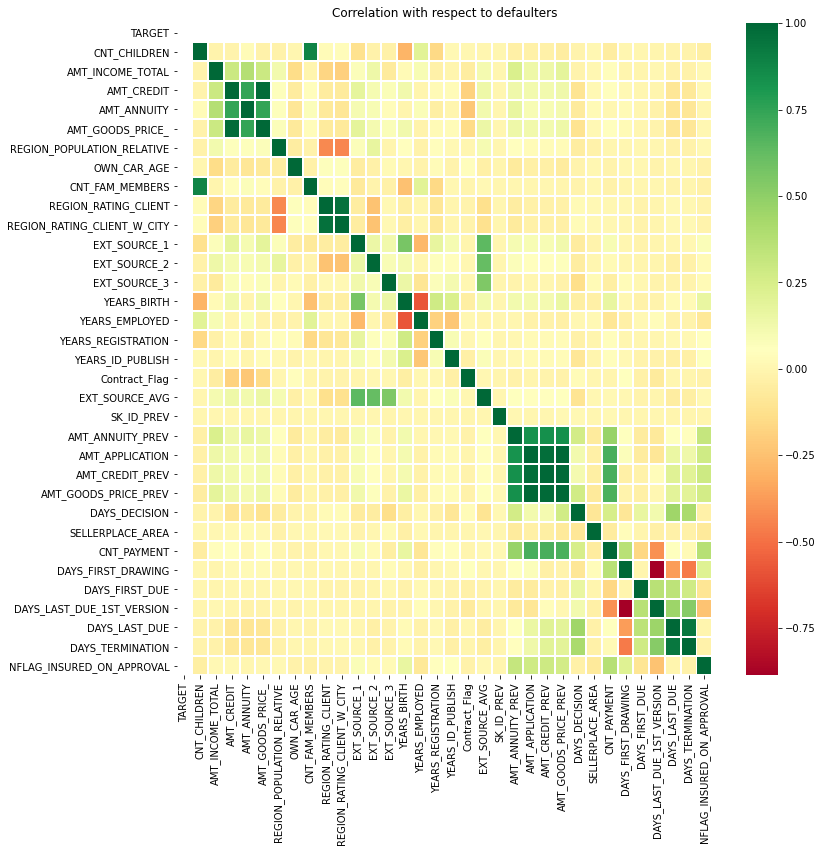

In [113]:
fig = plt.figure(figsize=(12,12))
plt.title('Correlation with respect to defaulters')
ax = sns.heatmap(Defaulter_df.corr(), cmap="RdYlGn",annot=False,linewidth =1)


**observations**
1.Credit amount is highly correlated with amount of goods price which is same as repayers
2.DAYS_FIRST_DUE and DAYS_TERMINATION correlation has increased in defaulters compaired with repayers


**Distribution of contract status with purpose**

In the Analysis, the Contract status is being related with th epurpose of loan. The purpose of this analysis is to find out the contract status pattern based on the purpose if credit.

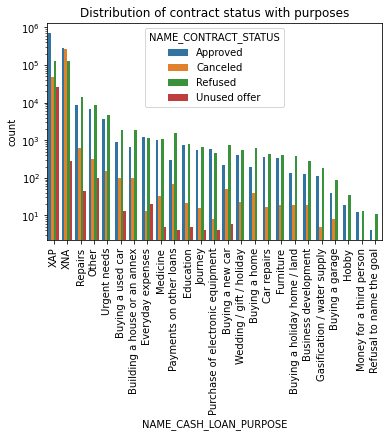

In [114]:
#----------> Distribution of contract status with purpose

plt.figure()
plt.xticks(rotation=90)
plt.yscale('log')
plt.title('Distribution of contract status with purposes')
ax = sns.countplot(data = Historical_data, x= 'NAME_CASH_LOAN_PURPOSE',order=Historical_data['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'NAME_CONTRACT_STATUS') 

**observation**: High number of loan puropse is unknown(XAP,XNA). from the known purpuses, Repairs has highest rejection and it is considered risky by the bank. 

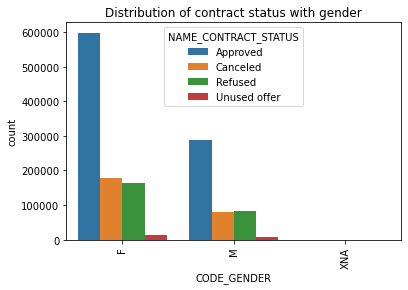

In [115]:
#----------> Distribution of contract status and gender

plt.figure()
plt.xticks(rotation=90)
plt.title('Distribution of contract status with gender')
ax = sns.countplot(data = Historical_data, x= 'CODE_GENDER',order=Historical_data['CODE_GENDER'].value_counts().index,hue = 'NAME_CONTRACT_STATUS') 

**observation**
no much insight were found

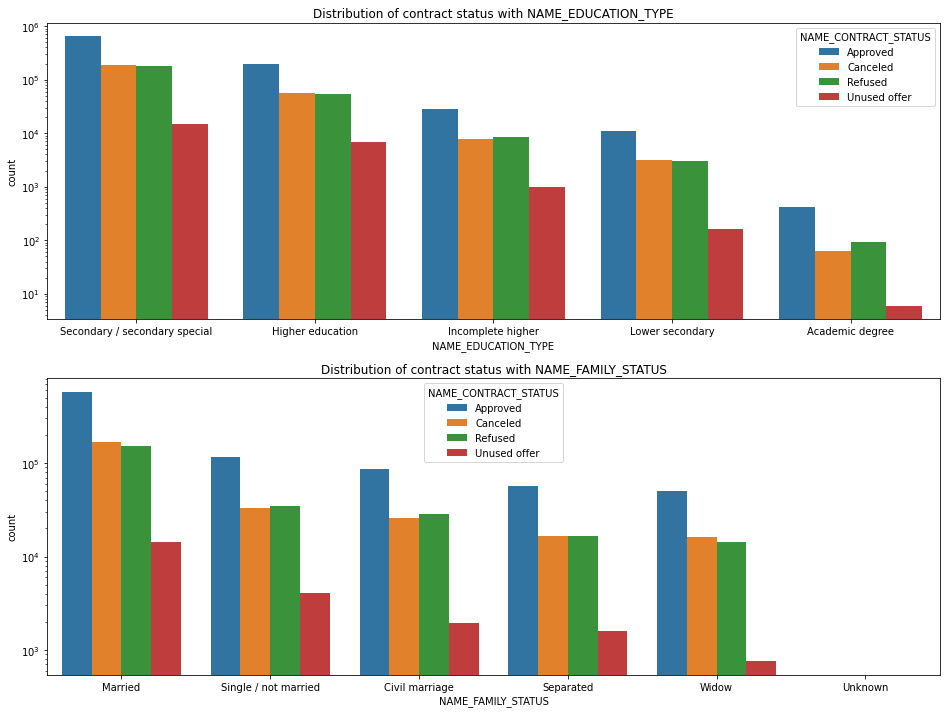

In [116]:
#----------> Distribution of contract status with EDUCATION_TYPE and FAMILY_STATUS
comv=['NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS']
length=len(comv)
fig = plt.figure(figsize=(16,12))
for i,j in itertools.zip_longest(comv,range(length)):
    plt.subplot(2,1,j+1)
    plt.yscale('log')
    plt.title('Distribution of contract status with {}'.format(i))
    ax = sns.countplot(data = Historical_data, x=i,order=Historical_data[i].value_counts().index,hue = 'NAME_CONTRACT_STATUS') 


**observation**
1. clients with secondary/secondary special have high chances of approval

2. clents who are married have highest number of approval amoung others 

                        -----------------------------End------------------------

## Analysis by:


##           Jagatjeet Jena
##           Swathi Somayaji